# Machine Learning Regression Project : 
# Health Care Analytics- <br>Detection of Parkinson's Disease by vocal frequency analysis

### Abstract:
Parkinson's disease (PD) is a progressive disorder of central nervous system that affects movement of body parts controlled by the nerves. Almost 70%-90% of patients with PD shows an affected voice. Various studies revealed that voice is one of the earliest indicators of PD. 

### Objective:
<u>This project will predict UPDRS (Unified Parkinson's Disease Rating Scale) score based on the collected voice features</u>. UPDRS generally ranges from 0 to 176, with 0 corresponding to a healthy state and 176 to a severe affliction. The higher the score, the worse the parkinsonism.

### Description of Parkinson's Dataset:
The dataset contains a range of biomedical vocal measurements from people with early-stage Parkinson's disease through a telemonitoring device. The main aim of the data is to predict 'total_UPDRS' based on the 16 voice measures (starting from Jitter to PPE) as mentioned below.

### Dataset Source: 
https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring

### Attribute Information:
* **subject#** - Serial Number <br>
* **age** - Patient's age<br>
* **sex** - Patient's gender '0': male, '1': female<br>
* **test_time** - Number of Times into trial. Integer part represents number of days <br>
* **total_UPDRS** - Clinician's total UPDRS score<br>
* **Jitter** - Measures of variation in fundamental frequency <br>
* **Shimmer** - Several measures of variation in amplitude <br>
* **NHR (Noise to Harmonies Ratio)** - measures of ratio of noise to tonal components in voice<br>
* **HNR (Harmonics to Noise Ratio)** - measures of ratio of noise to tonal components in voice<br>
* **RPDE (Recurrence Period Density Entropy)** - Dynamic complex measurement<br>
* **DFA (Detrended Fluctuation Analysis)** - Signal fractal scaling exponent<br>
* **PPE (Pitch Period Entropy)** - A nonlinear measure of fundamental frequency variation<br>

### Implementation of this Project in Real Life:
The first sign of PD is change in quality of voice: a reduced volume, monotone pitch etc. Since detection of early stages of Parkinson's Disease is very crucial, this project shows how assesment of voice can be used for day to day monitoring (local or remote) of PD patients. As a result, the entire screening process will be cost effective and also individual's quality of life can be improved through early treatment of this disease.

### Libraries Required:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statistics as stat
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Math, display
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate

### Given Dataset:

In [2]:
parkinsons_df = pd.read_csv('parkinsons.csv')
parkinsons_df.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72.0,male,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,2,72.0,male,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,3,72.0,male,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,4,72.0,male,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,5,72.0,male,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## Exploratory Data Analysis:

In [3]:
print('Parkinson\'s dataset has {} rows & {} columns' .format(parkinsons_df.shape[0], 
                                                              parkinsons_df.shape[1]))

Parkinson's dataset has 5883 rows & 21 columns


### Displaying all Features:

In [4]:
parkinsons_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'total_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

### How many different datatypes do these 21 columns contain?

In [5]:
pd.value_counts(parkinsons_df.dtypes)

float64    19
int64       1
object      1
dtype: int64

### Displaying Non-Numerical Features:

In [6]:
categorical_input_cols = parkinsons_df.select_dtypes(exclude="number").columns.to_list()
categorical_input_cols

['sex']

### How many unique values are present inside non-numerical feature:

In [7]:
parkinsons_df.select_dtypes(exclude="number").describe()

,sex
count,5880
unique,2
top,male
freq,4012


### Lets convert object datatype to categorical datatype for 'sex' column:

In [8]:
parkinsons_df['sex'] = parkinsons_df['sex'].astype('category')
parkinsons_df.dtypes

subject#            int64
age               float64
sex              category
test_time         float64
total_UPDRS       float64
Jitter(%)         float64
Jitter(Abs)       float64
Jitter:RAP        float64
Jitter:PPQ5       float64
Jitter:DDP        float64
Shimmer           float64
Shimmer(dB)       float64
Shimmer:APQ3      float64
Shimmer:APQ5      float64
Shimmer:APQ11     float64
Shimmer:DDA       float64
NHR               float64
HNR               float64
RPDE              float64
DFA               float64
PPE               float64
dtype: object

### Displaying Numerical Features:

In [9]:
numeric_col = parkinsons_df.select_dtypes(include=np.number).columns.tolist()
print(numeric_col)

['subject#', 'age', 'test_time', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


Among these numerical features; **subject#** represents only serial number. So we can drop this column. 
<br>But before drop, lets create a copy of this dataframe so that it doesn't affect original dataframe.

### Creating a copy of Original Dataframe:

In [10]:
df1 = pd.DataFrame()
df1 = parkinsons_df.copy()

### dropping 'subject' column:

In [11]:
df1.drop(['subject#'], axis=1, inplace = True)

### Breaking numerical columns into two following parts:

In [12]:
continuous_input_cols = numeric_col[1:3] + numeric_col[4:]
target_col = numeric_col[3] 
print('numeric input columns: \n\n', continuous_input_cols)
print('\n')
print('Target Column: ', target_col)

numeric input columns: 

 ['age', 'test_time', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


Target Column:  total_UPDRS


In [13]:
print('Now dataset has {} rows & {} columns' .format(df1.shape[0], df1.shape[1]))

Now dataset has 5883 rows & 20 columns


### Statistical Description of Numerical Features:

In [14]:
df1.describe()

,age,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5882.000000,5882.000000,5880.000000,5881.000000,5879.000000,5880.000000,5878.000000,5879.000000,5881.000000,5880.000000,5880.000000,5880.000000,5879.000000,5881.000000,5879.000000,5881.000000,5881.000000,5881.000000,5879.000000
mean,64.807378,92.832029,29.024227,0.006152,0.000044,0.002987,0.003277,0.008961,0.034022,0.310866,0.017150,0.020138,0.027475,0.051445,0.032108,21.681338,0.541462,0.653189,0.219579
std,8.818435,53.437616,10.697383,0.005622,0.000036,0.003123,0.003731,0.009369,0.025825,0.230180,0.013233,0.016658,0.019981,0.039697,0.059674,4.289378,0.100955,0.070902,0.091482
min,36.000000,-4.262500,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,46.847000,21.371000,0.003580,0.000022,0.001580,0.001822,0.004730,0.019130,0.175000,0.009280,0.010790,0.015670,0.027830,0.010953,19.409000,0.469790,0.596070,0.156340
50%,65.000000,91.494500,27.576000,0.004900,0.000034,0.002250,0.002490,0.006750,0.027480,0.253000,0.013700,0.015925,0.022700,0.041100,0.018441,21.928000,0.542200,0.643550,0.205500
75%,72.000000,138.430000,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039730,0.365000,0.020570,0.023750,0.032710,0.061720,0.031456,24.443000,0.614050,0.711290,0.264490
max,85.000000,215.490000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


**<u>Inference</u>**: 
* People aged from 36 to 85 are being affected by Parkinson's Disease <br>
* there are some negative test time present in this dataset. So we need to remove it <br>
* Speech UPDRS values are ranging between 7 to 54.9
* for the columns: "Jitter:DDP", "Jitter:PPQ5", "Jitter:RAP", "NHR"; **(SD/MEAN) > 1**. <br>It means for these three columns mean values are not reliable. 

### Lets nullify -ve values from Test_Time column:

In [15]:
print('total number of records where test_time is a negative value is = {}'
      .format(sum(df1['test_time'] < 0)))
df1.loc[(df1['test_time'] < 0), 'test_time'] = np.nan
print('After nullification total number of records where test_time is a negative value is = {}'
      .format(sum(df1['test_time'] < 0)))

total number of records where test_time is a negative value is = 12
After nullification total number of records where test_time is a negative value is = 0


### Checking if there exists any NaN value in dataframe:

In [16]:
df1.isnull().sum(axis=0)

age               1
sex               3
test_time        13
total_UPDRS       3
Jitter(%)         2
Jitter(Abs)       4
Jitter:RAP        3
Jitter:PPQ5       5
Jitter:DDP        4
Shimmer           2
Shimmer(dB)       3
Shimmer:APQ3      3
Shimmer:APQ5      3
Shimmer:APQ11     4
Shimmer:DDA       2
NHR               4
HNR               2
RPDE              2
DFA               2
PPE               4
dtype: int64

### Handling NaN values:

In [17]:
total_nan_values = sum(df1.isna().sum())
print('total number of null values = ', total_nan_values)
nan_percent = (total_nan_values / df1.shape[0]) * 100
print('Percentage of null values w.r.t total records = {}%' .format(np.round(nan_percent,2)))

total number of null values =  69
Percentage of null values w.r.t total records = 1.17%


### Since NaN% is < 5%; so lets drop these NaN values:

In [18]:
df1.dropna(inplace=True)
print('now dataframe has {} rows & {} columns' .format(df1.shape[0], df1.shape[1]))

now dataframe has 5863 rows & 20 columns


### Checking if there exists any duplicate value in dataframe:

In [19]:
df1.duplicated(keep='first').sum()

0

### Visualizing Histograms of Numerical Features:

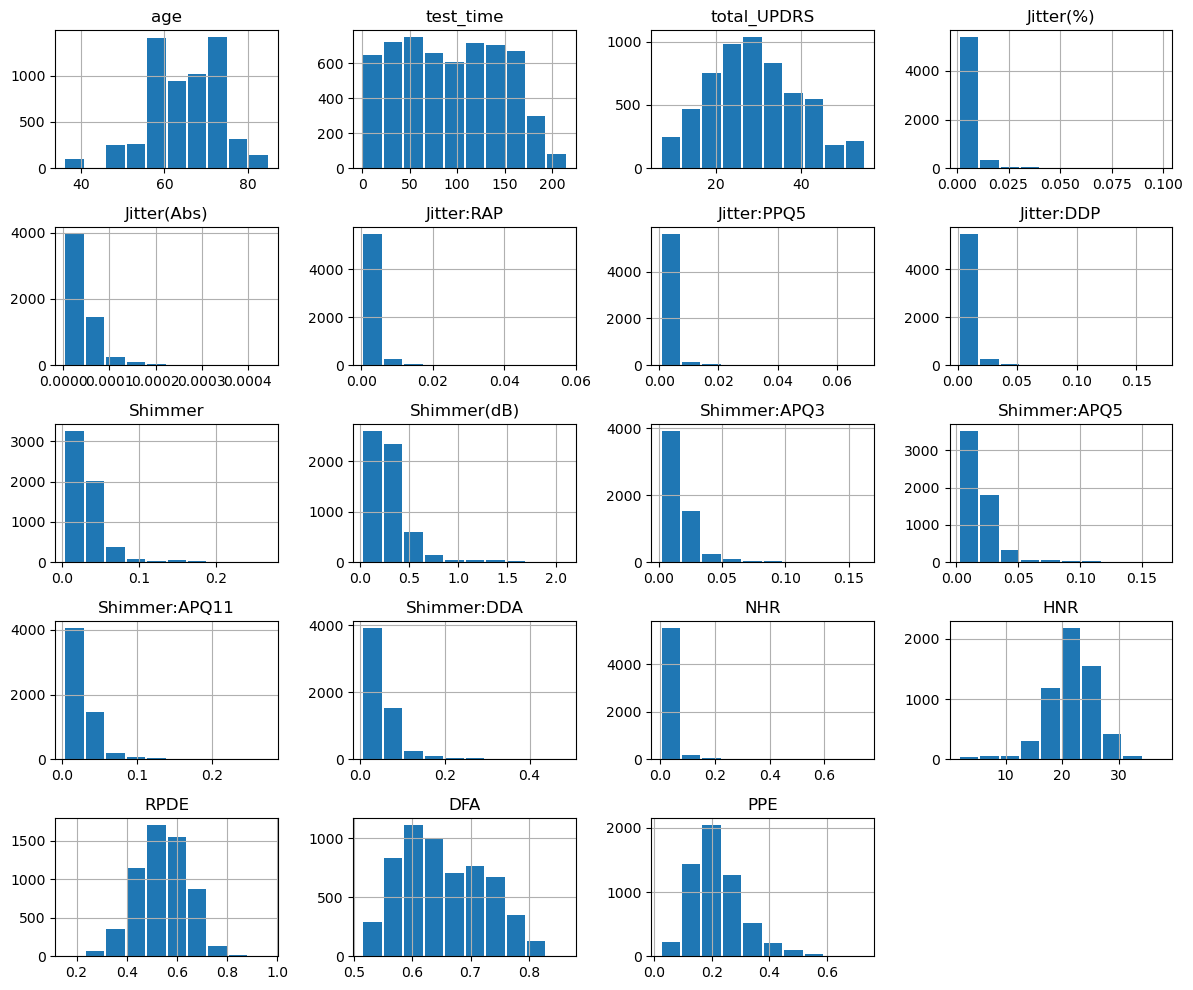

In [20]:
df1[numeric_col[1:]].hist(rwidth=0.9, figsize = (12,10))
plt.tight_layout();

**<u>Inference</u>**: 
* Age, test_time seemed to be bi-modal distributions
* HNR seemed to follow a left skkewed distribution
* Target feature 'total_UPDRS' is almost following a normal distribution
* Jitter, Shimmer, NHR, DFA, PPE - these features are seeming to rightly skewed.

In [21]:
ip_features_tobe_transformed = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
                                'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                                'Shimmer:APQ11', 'Shimmer:DDA', 'NHR']

Later(may be before train-test split), we will apply log transformation on these features to make them close to normal distribution

### Visualizing target feature with respect to each numeric input feature:

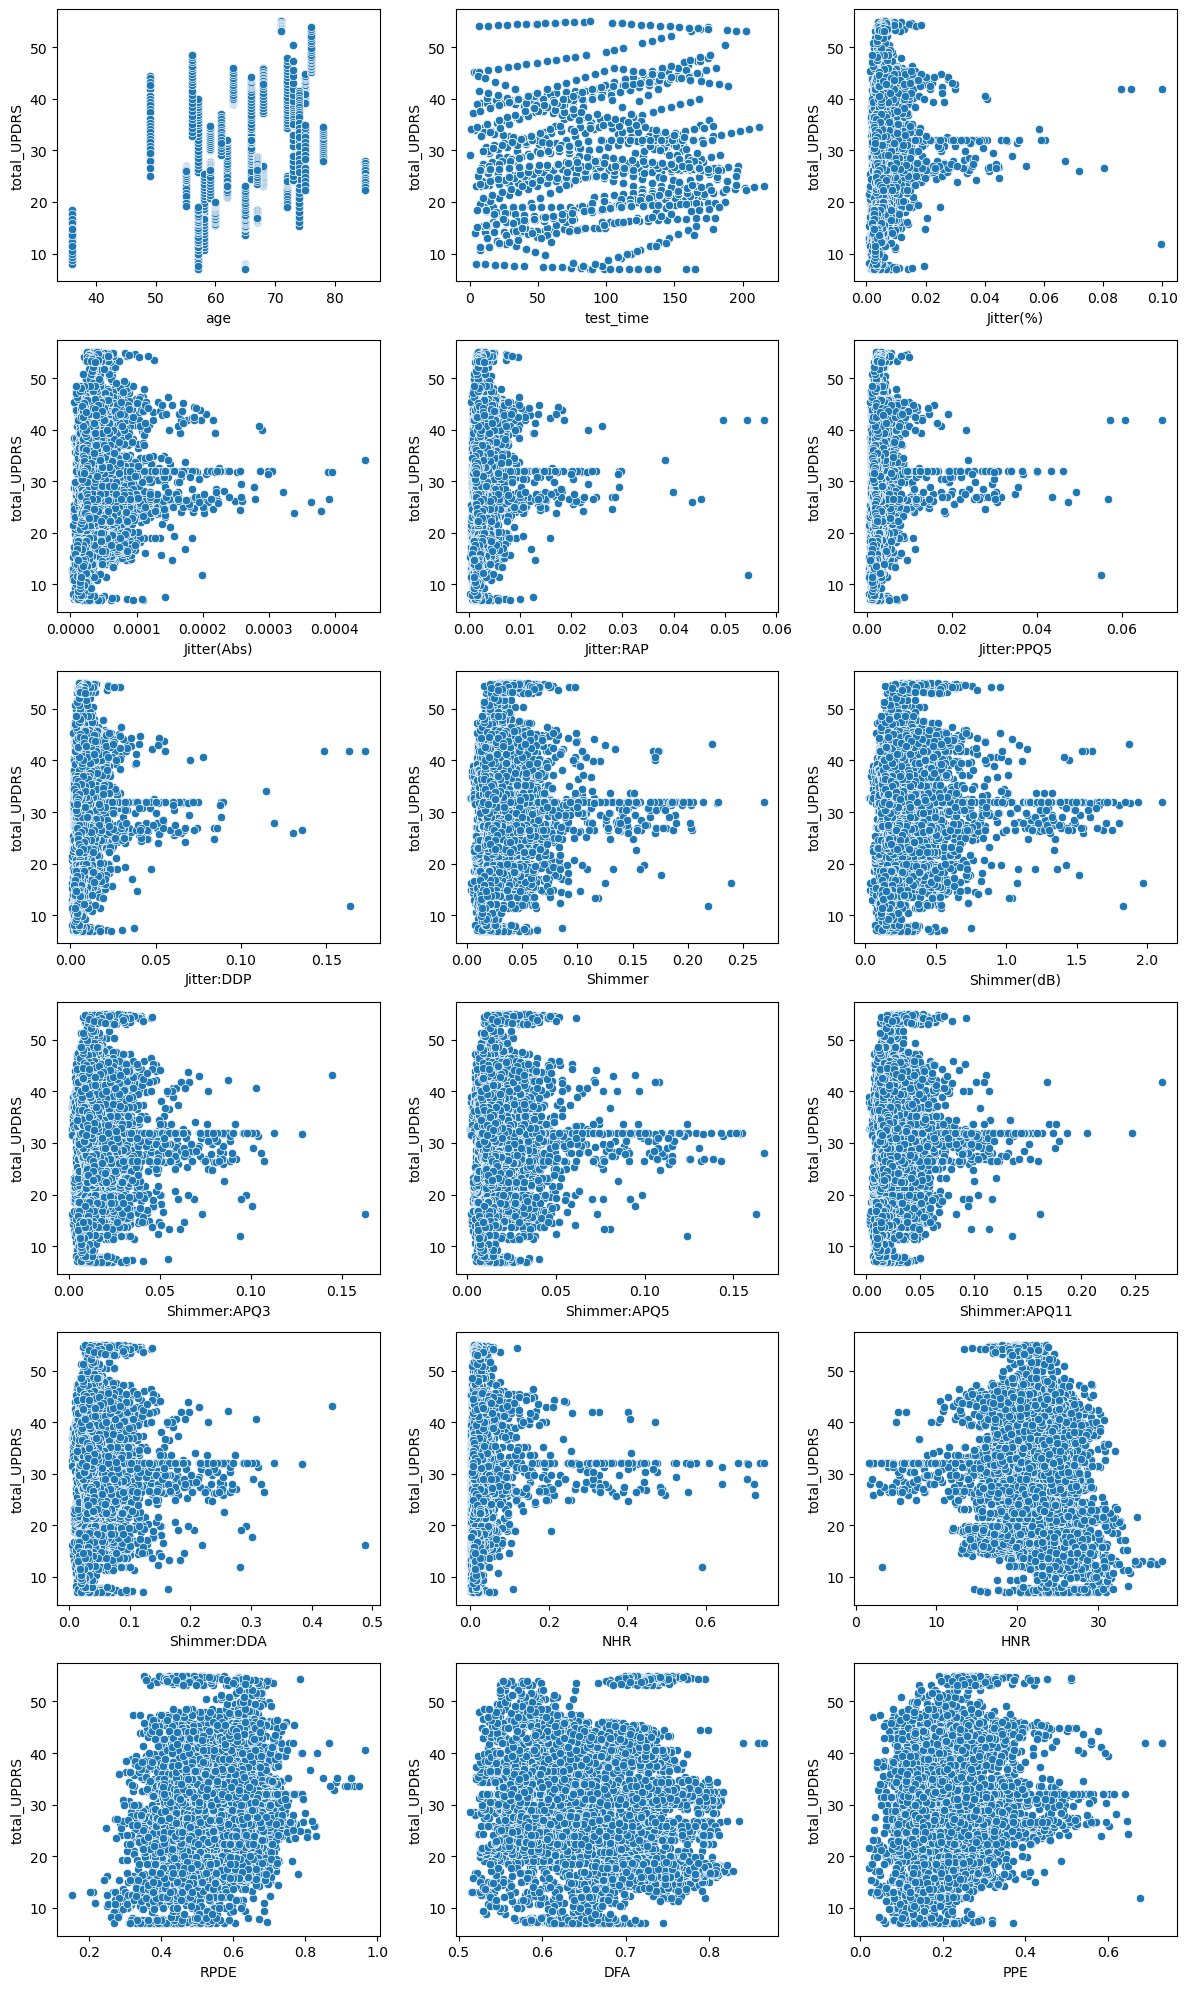

In [22]:
plt.figure(figsize=(12,20))
for i in range(0, len(continuous_input_cols)):
    axi = plt.subplot(6,3,i+1)
    sns.scatterplot(data=df1, x=continuous_input_cols[i], y='total_UPDRS', ax=axi)
plt.tight_layout();

**<u>Inference</u>**: 
* from above plots; we can hardly see any linear relationship between input & output features.
* Also there are same behaviour for multiple graphs; which may lead to **multicollinearity** problem for Multiple Linear Regression problem.

### An example of strong evidence of Multicollinearity:

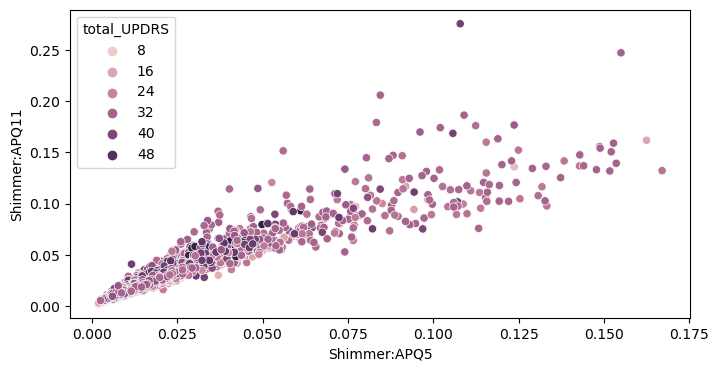

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = df1, x = 'Shimmer:APQ5', y = 'Shimmer:APQ11', hue = 'total_UPDRS');

**<u>Insights</u>**:
* here we can see as Shimmer:APQ5 is increasing; Shimmer:APQ11 variable values are also increasing
* so we will handle multicollinearity after findling the correlation coefficients between numeric features

### Relationship between Shimmer & Jitter Components:

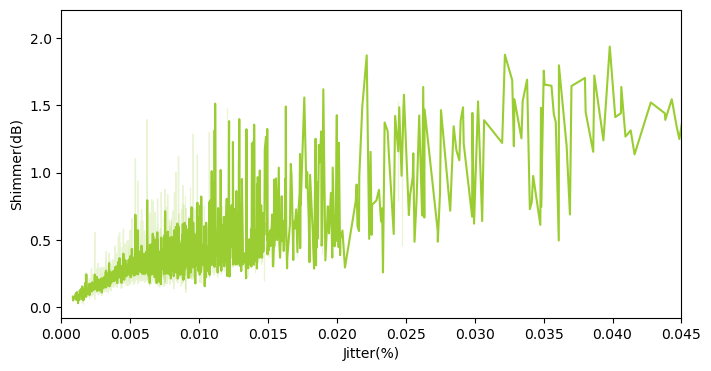

In [24]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df1, x='Jitter(%)', y='Shimmer(dB)', c='yellowgreen')
plt.xlim(0,0.045);

**<u>Insights</u>**:
* Jitter represents variability of fundamental frequency while Shimmer refers to amplitude variation of sound wave.
* So we can see there is a strong correlation between Shimmer & Jitter Components

### Visualizing Output feature w.r.t Input features:

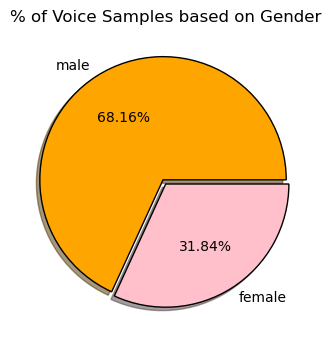

In [25]:
plt.figure(figsize = (5,4))
df1['sex'].value_counts(normalize=True).plot(kind='pie', autopct= '%.2f%%', 
                                             colors=['orange', 'pink'], explode=[0.04,0],
                                             shadow=True, wedgeprops={'edgecolor':'black'})
plt.ylabel('')
plt.title('% of Voice Samples based on Gender');

In given dataset, almost 68% voice samples are of males and remaing 32% are of females.

### Males are more prone to Parkinson's Disease?

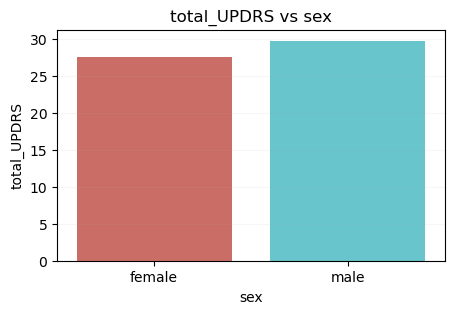

In [26]:
plt.figure(figsize=(5,3))
sns.barplot(data=df1, x = 'sex', y = 'total_UPDRS', errorbar=None, palette='hls')
plt.grid(axis='y', alpha=0.1)
plt.title('total_UPDRS vs sex');

It can be understood, in given dataset males are showing higher tendency towards Parkinson's Disease compared to females.

### total_UPDRS vs Age:

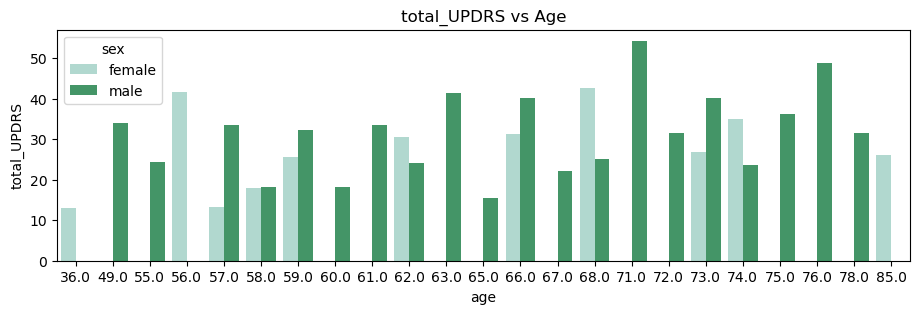

In [27]:
plt.figure(figsize=(11,3))
sns.barplot(data=df1, x = 'age', y = 'total_UPDRS', hue = 'sex', errorbar=None, palette='BuGn')
plt.title('total_UPDRS vs Age');

Here we can see, Males aged to 71 are highly prone towards parkinson's disease.

### Feature Extraction (Age Group) for Visualization Purpose:

In [28]:
pdf2 = df1.copy()
def age_group(data):
    if (data['age'] >= 30) and (data['age']<=60):
        return 'middle aged'
    elif data['age'] > 60:
        return 'old'

pdf2['Age_Group'] = pdf2.apply(age_group, axis=1)

### Distribution based on different Age Groups:

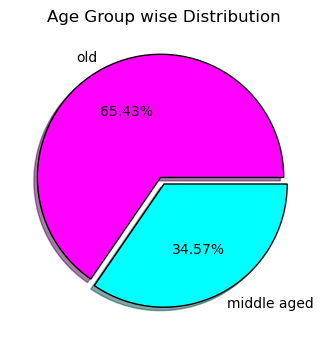

In [29]:
plt.figure(figsize=(5,4))
pdf2['Age_Group'].value_counts().plot(kind='pie', autopct= '%.2f%%', 
                                      colors=['magenta', 'cyan'], explode=[0.06,0],
                                      shadow=True, wedgeprops={'edgecolor':'black'})
plt.ylabel('')
plt.title('Age Group wise Distribution');

### Jitter(%) Vs. Age Group:

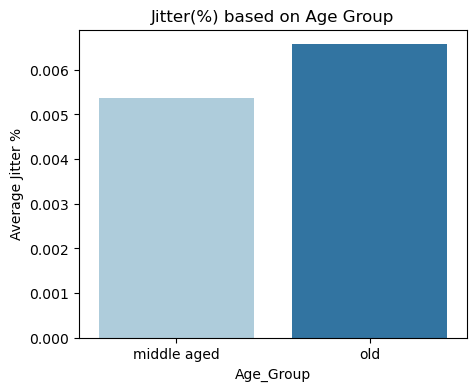

In [30]:
plt.figure(figsize=(5,4))
tdf = pdf2.groupby('Age_Group').agg({'Jitter(%)':'mean'})
sns.barplot(data=tdf, x=tdf.index, y='Jitter(%)', palette='Paired')
plt.ylabel('Average Jitter %')
plt.title('Jitter(%) based on Age Group');

It shows: Average Jitter% for older people is significantly greater than that of middle aged people

### Analyzing Amplitude Variation (Shimmer) of Voice Signals:

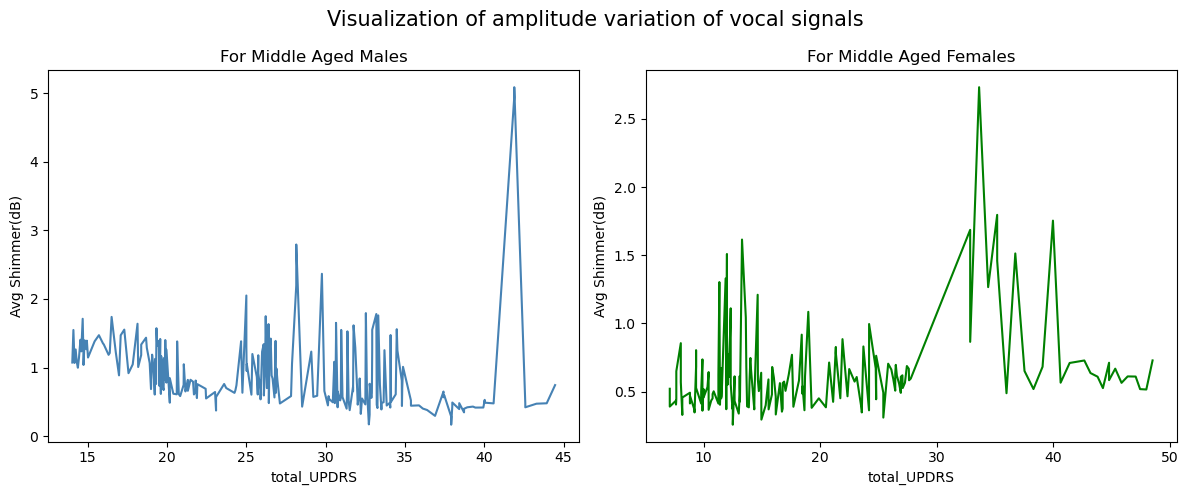

In [31]:
pdf2['Avg Shimmer(dB)'] = pdf2['Shimmer(dB)']/pdf2['Shimmer(dB)'].mean()
plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
cond1 = pdf2['sex']== 'male'
cond2 = pdf2['Age_Group']== 'middle aged'
sns.lineplot(data=pdf2[cond1 & cond2], x='total_UPDRS', y='Avg Shimmer(dB)', errorbar=None, 
             ax=ax1, c='steelblue')
ax1.set_title('For Middle Aged Males')

ax2 = plt.subplot(1,2,2)
cond3 = pdf2['sex']== 'female'
sns.lineplot(data=pdf2[cond2 & cond3], x='total_UPDRS', y='Avg Shimmer(dB)', errorbar=None,
             ax=ax2, c='green')
ax2.set_title('For Middle Aged Females')
plt.suptitle('Visualization of amplitude variation of vocal signals', fontsize=15)
plt.tight_layout();

For middle aged people; shimmer(dB) increased significantly with decreasing voice loudness.

### Analyzing Vocal Jitter Components:

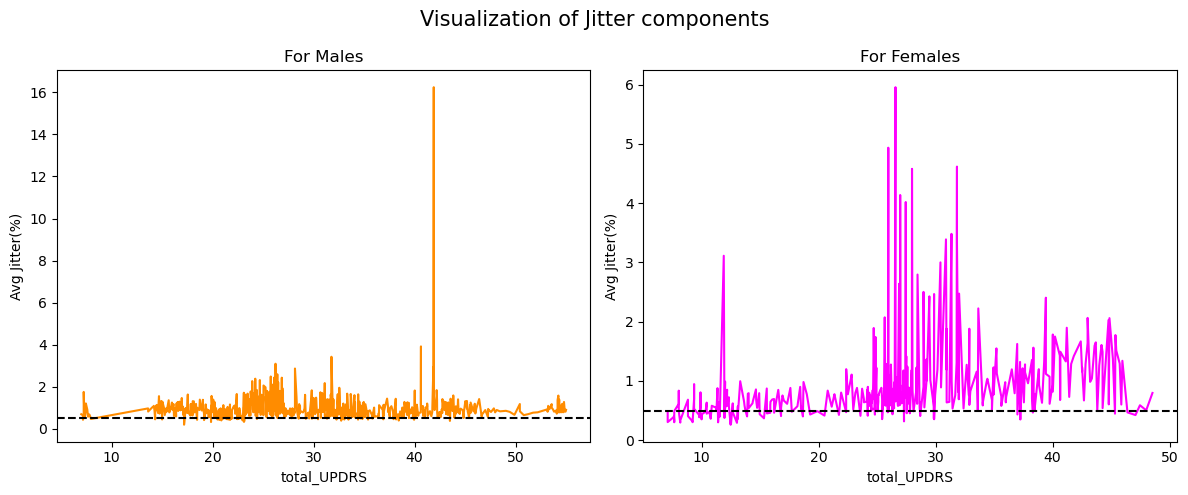

In [32]:
pdf2['Avg Jitter(%)'] = pdf2['Jitter(%)']/pdf2['Jitter(%)'].mean()
plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.lineplot(data=pdf2[pdf2['sex']== 'male'], x='total_UPDRS', y='Avg Jitter(%)', errorbar=None, 
             ax=ax1, c='darkorange')
ax1.axhline(y=0.5, c='black', ls='--')
ax1.set_title('For Males')
ax2 = plt.subplot(1,2,2)
sns.lineplot(data=pdf2[pdf2['sex']== 'female'], x='total_UPDRS', y='Avg Jitter(%)', errorbar=None,
             ax=ax2, c='magenta')
ax2.axhline(y=0.5, c='black', ls='--')
ax2.set_title('For Females')
plt.suptitle('Visualization of Jitter components', fontsize=15)
plt.tight_layout();

**<u>Inference</u>**:
* for a healthy person, acceptable normal threshold is 0.5% jitter
* both male & females have high jitter values
* higher mean jitter % may be associated with parkinson disease
* Due to lack of control on vocal chord vibrartion cycle of glottis, jitter value gets impacted

### How HNR & NHR are related to each other?

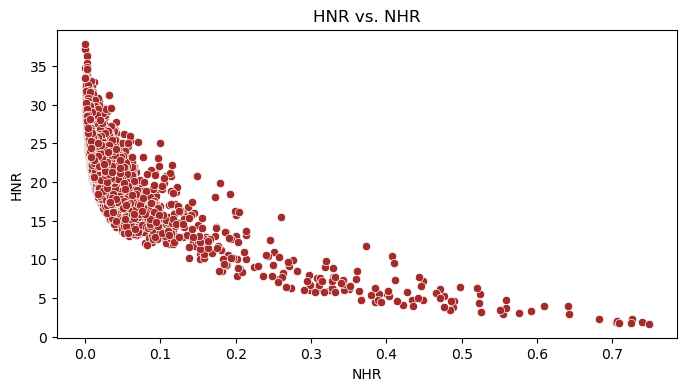

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=pdf2, x='NHR', y='HNR', color='brown')
plt.title('HNR vs. NHR');

**<u>Insights</u>**:
* HNR & NHR asses presence of noise in voice signal
* we can see; NHR & HNR are inversely related to each other
* a lower NHR & higher HNR indicates superior voice quality

### HNR vs total_UPDRS:

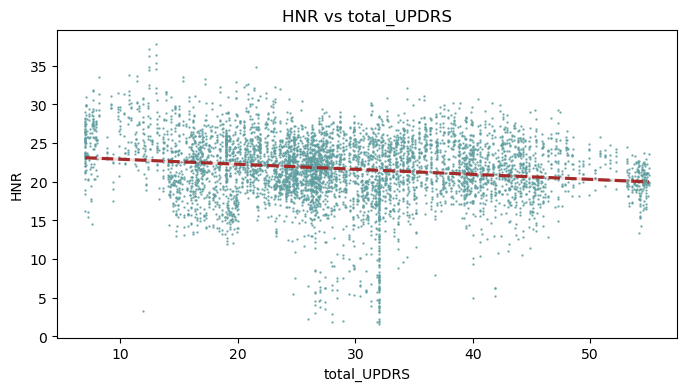

In [34]:
plt.figure(figsize=(8,4))
sns.regplot(data=pdf2, x='total_UPDRS', y='HNR', color='cadetblue', scatter_kws={'s':0.5}, 
            line_kws={'color':'brown', 'ls':'--'})
plt.title('HNR vs total_UPDRS');

People who are highly affected by PD, have lower HNR values

## Correlation Matrix for Numerical Features (without using HeatMap):

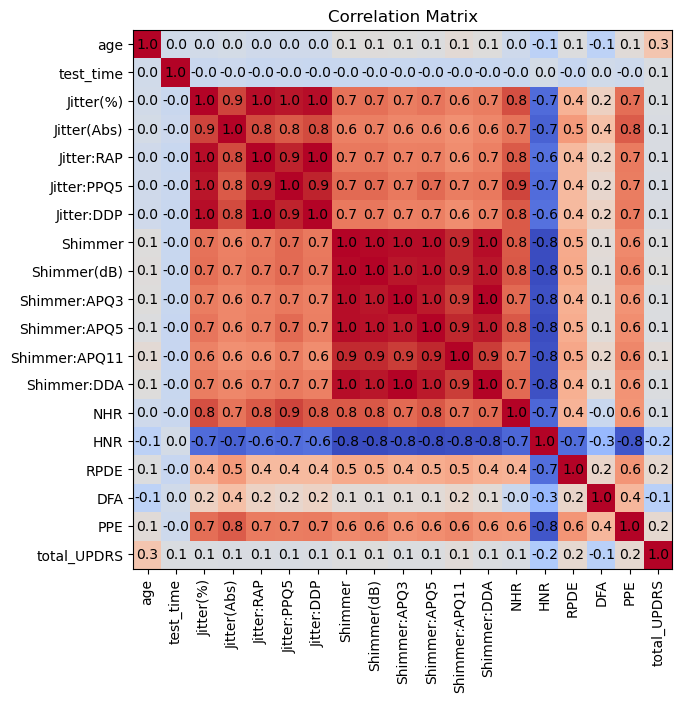

In [35]:
rough_df = pd.DataFrame()
rough_df = df1[continuous_input_cols]
rough_df.insert(loc=18, column = 'total_UPDRS', value = df1['total_UPDRS'])

corr_mat = rough_df.corr()
plt.figure(figsize=(15,7))
plt.imshow(corr_mat, cmap='coolwarm')
matrix = corr_mat.values
for j in range(0, matrix.shape[0]):
    for k in range(0, matrix.shape[1]):
        plt.text(k, j, np.round(matrix[j][k],1), ha = 'center', va = 'center')
        plt.xticks(ticks=range(0,len(matrix)), labels = corr_mat.columns, rotation = 90)
        plt.yticks(ticks=range(0,len(matrix)), labels = corr_mat.columns)
plt.title('Correlation Matrix');

**<u>Insights</u>**:
* Here we can see, many input features are having high correlation coefficients (>=0.7) with other input features. That means there exists Multicollinearity condition.
* HNR is showing high negative correlation coefficient with other features.
* lets see an example: all 5 jitter components are having high correlation with each other but have same correlation (very low) with target feature. So how to decide which feature should we eliminate?
* Lets use Lasso Regression to get the feature importance

## Feature Selection using Lasso (L1) Regression:

In [36]:
# Creating another dataframe to perform Lasso & then One-Hot encoding technique for catg. columns:
df2 = pd.DataFrame()
df2 = pd.get_dummies(df1, drop_first=True)

In [37]:
# Seperating Input & Output Feature:
y_trial = df2['total_UPDRS']
x_trial = df2.drop(['total_UPDRS'], axis = 1)

In [38]:
# Standardizing numerical features:
stdscaler = StandardScaler()
for c in x_trial.columns:
    x_trial[c] = stdscaler.fit_transform(x_trial[[c]])

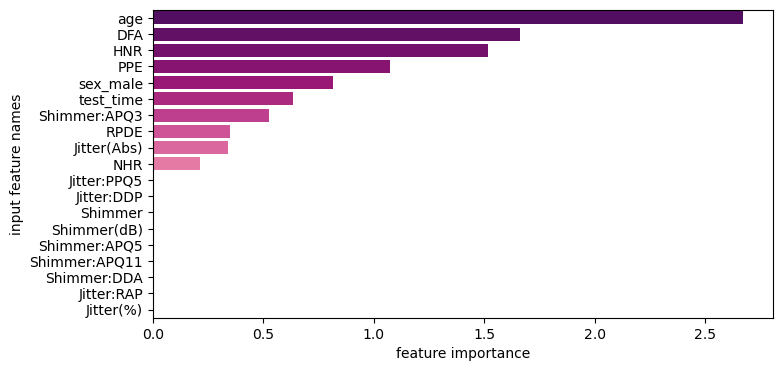

In [39]:
# Model Fitting:
lasso = Lasso(alpha=0.2)
lasso.fit(x_trial, y_trial)
lasso_df = pd.DataFrame()
lasso_df['input feature names'] = x_trial.columns
lasso_df['abs feature importance'] = np.abs(lasso.coef_)
lasso_df.sort_values(by=['abs feature importance'], ascending=False, inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(data=lasso_df, y='input feature names', x='abs feature importance', orient='h', 
            palette='RdPu_r')
plt.xlabel('feature importance');

**<u>Conclusion</u>**:
* The features we will drop are: 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'Jitter:RAP', 'Jitter(%)'. <br>
* Including to above features, we will also drop 'NHR'; as we have already seen linear relationship between HNR & NHR 

### Avoiding Multicollinearity Problem:

In [40]:
eliminated_input_features = \
list(lasso_df[lasso_df['abs feature importance'] == 0]['input feature names'])
df1.drop(eliminated_input_features, axis=1, inplace = True)
df1.drop(['NHR'], axis=1, inplace=True)
print('Now dataframe has {} rows and {} columns' .format(df1.shape[0], df1.shape[1]))
eliminated_input_features.append('NHR')

Now dataframe has 5863 rows and 10 columns


### Whether we really overcame Multicollinearity?

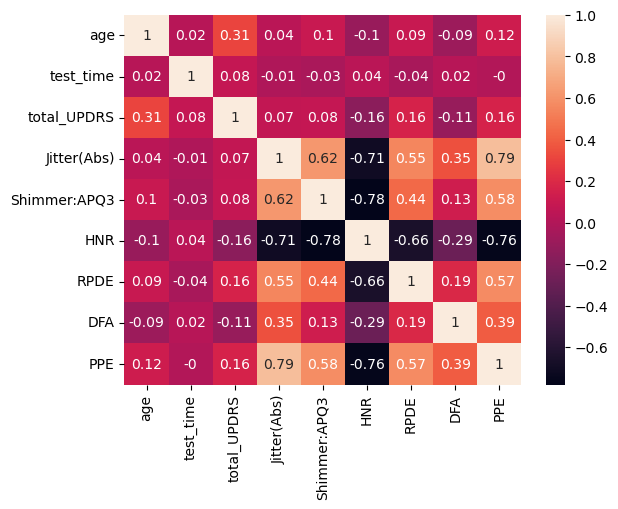

In [41]:
numerical_features1 = ['age', 'test_time', 'total_UPDRS', 'Jitter(Abs)', 'Shimmer:APQ3', 'HNR', 
                       'RPDE', 'DFA', 'PPE']
corr_matrix = np.round(df1[numerical_features1].corr(),2)
sns.heatmap(corr_matrix, annot=True);

Still there are some input features where absolute value of correlation coefficient is greater than or equal to 0.7 <br>
but as of now, we will not remove them as we may loose important information.

### Finally Numerical & Categorical Columns are:

In [42]:
print('Numerical Features    : \n',df1.select_dtypes(include=np.number).columns.tolist())
print('\nCategorical Features: \n',df1.select_dtypes(exclude=np.number).columns.tolist())

Numerical Features    : 
 ['age', 'test_time', 'total_UPDRS', 'Jitter(Abs)', 'Shimmer:APQ3', 'HNR', 'RPDE', 'DFA', 'PPE']

Categorical Features: 
 ['sex']


### Log transformation on selected Input Features:

In [43]:
for feature in eliminated_input_features:
    if (feature in ip_features_tobe_transformed) == True:
        ip_features_tobe_transformed.remove(feature)
print('Finally List of Input Features to be transformed =\n', ip_features_tobe_transformed)

Finally List of Input Features to be transformed =
 ['Jitter(Abs)', 'Shimmer:APQ3']


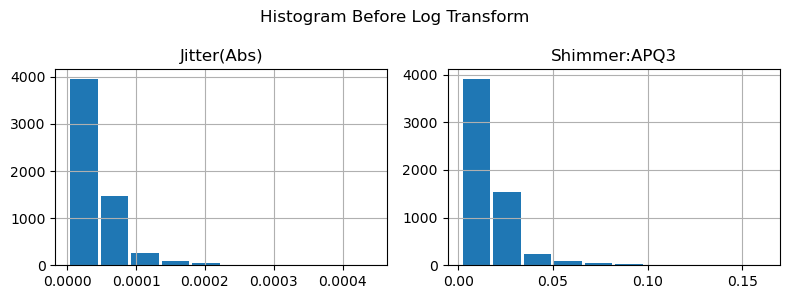

In [44]:
df1[['Jitter(Abs)', 'Shimmer:APQ3']].hist(rwidth=0.9, figsize = (8,3))
plt.suptitle('Histogram Before Log Transform')
plt.tight_layout();

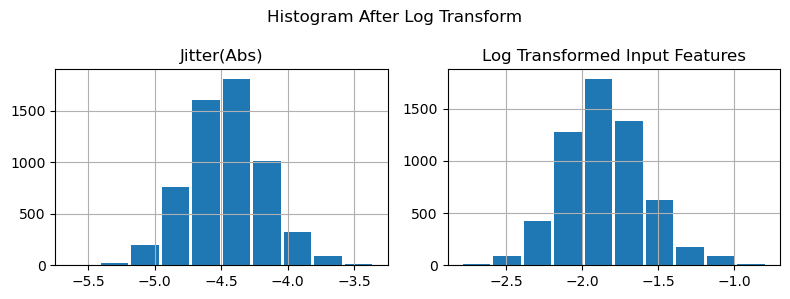

In [45]:
df1[ip_features_tobe_transformed] = np.log10(df1[ip_features_tobe_transformed])
df1[ip_features_tobe_transformed].hist(rwidth=0.9, figsize = (8,3))
plt.title('Log Transformed Input Features')
plt.suptitle('Histogram After Log Transform')
plt.tight_layout();

### Seperating Input features & Target variable:

In [46]:
y = df1['total_UPDRS']
x = df1.drop(['total_UPDRS'], axis=1)

In [47]:
display(x.head())
print('Shape of X is = ',x.shape)

,age,sex,test_time,Jitter(Abs),Shimmer:APQ3,HNR,RPDE,DFA,PPE
0,72.0,male,5.6431,-4.471083,-1.842241,21.640,0.41888,0.54842,0.16006
1,72.0,male,12.6660,-4.774691,-2.002614,27.183,0.43493,0.56477,0.10810
2,72.0,male,19.6810,-4.609065,-2.134304,23.047,0.46222,0.54405,0.21014
3,72.0,male,25.6470,-4.575118,-1.956245,24.445,0.48730,0.57794,0.33277
4,72.0,male,33.6420,-4.696804,-2.168130,26.126,0.47188,0.56122,0.19361


Shape of X is =  (5863, 9)


In [48]:
display(y.head())
print('Shape of y is = ',y.shape)

0    34.398
1    34.894
2    35.389
3    35.810
4    36.375
Name: total_UPDRS, dtype: float64

Shape of y is =  (5863,)


### Train-Test Split:

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1234)

### Checking Shape of Train datasets:

In [50]:
display(x_train.head())
print('Shape of X_train is = ',x_train.shape)

,age,sex,test_time,Jitter(Abs),Shimmer:APQ3,HNR,RPDE,DFA,PPE
3238,60.0,male,26.816,-4.270835,-1.706196,16.738,0.61163,0.73042,0.18762
4939,62.0,female,86.294,-3.927860,-1.114922,7.892,0.68254,0.60741,0.32934
2805,67.0,male,137.870,-4.231362,-1.774691,22.221,0.45891,0.74948,0.20871
2056,65.0,male,138.460,-4.573489,-2.183096,25.577,0.48626,0.57716,0.17616
5467,85.0,female,148.660,-4.505845,-1.817300,22.001,0.49705,0.58209,0.14473


Shape of X_train is =  (4104, 9)


In [51]:
display(y_train)
print('Shape of y_train is = ',y_train.shape)

3238    16.022
4939    31.818
2805    16.475
2056    21.194
5467    24.198
         ...  
666     43.495
3282    19.581
1321    26.006
725     39.696
2868    44.338
Name: total_UPDRS, Length: 4104, dtype: float64

Shape of y_train is =  (4104,)


### Checking Shape of Test datasets:

In [52]:
display(x_test.head())
print('Shape of X_train is = ',x_test.shape)

,age,sex,test_time,Jitter(Abs),Shimmer:APQ3,HNR,RPDE,DFA,PPE
1364,58.0,male,87.353,-3.992679,-1.945387,21.683,0.54519,0.69943,0.27026
5218,67.0,male,70.777,-4.314258,-1.870955,18.868,0.55549,0.66144,0.25109
3039,57.0,female,117.880,-5.035269,-2.272459,29.682,0.48401,0.57020,0.21354
4594,59.0,male,17.578,-4.477556,-2.143271,24.307,0.54678,0.77564,0.14520
3258,60.0,male,165.760,-4.207608,-1.604674,15.424,0.63582,0.75027,0.31550


Shape of X_train is =  (1759, 9)


In [53]:
display(y_test)
print('Shape of y_train is = ',y_test.shape)

1364    19.0000
5218    27.6670
3039     9.9866
4594    33.2270
3258    19.7230
         ...   
3492    33.7140
5120    40.6370
2602    26.6630
704     40.8400
4919    32.0000
Name: total_UPDRS, Length: 1759, dtype: float64

Shape of y_train is =  (1759,)


## Pre-processing on Train Dataset:

### User Defined Function for Outlier Treatment:
* User can either remove all outliers ("Y") or they can adjust outliers to nearest whisker ("N")
* Lets assume, Business has decided to remove all outliers, if its volume is less than 5% 

In [54]:
def outlier_treatment(dataframe, column_name):
    
    count1 = count2 = total_count = axis1 = axis2 = Q1 = Q3 = IQR = 0
    low_limit = upper_limit = percent = 0
    choice = ''
    
    plt.figure(figsize=(8,3))
    axis1 = plt.subplot(1,2,1)
    sns.boxplot(data = dataframe, x = column_name, ax = axis1)
    plt.title('Box Plot for %s' %(column_name))
    axis2 = plt.subplot(1,2,2)
    sns.histplot(data = dataframe, x = column_name, kde = True, ax = axis2,
                 color ='navy', line_kws = {'lw':3, 'ls':'-'})
    plt.title('Histogram Plot for %s' %(column_name))
    plt.tight_layout();

    Q1 = dataframe[column_name].quantile([0.25,0.75]).values[0]
    Q2 = np.percentile(dataframe[column_name], 50)
    Q3 = dataframe[column_name].quantile([0.25,0.75]).values[1]
    IQR = Q3 - Q1
    low_limit   = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    count1 = sum(dataframe[column_name] < low_limit)
    count2 = sum(dataframe[column_name] > upper_limit)
    total_count = count1 + count2
    print('Q1                                                = ', np.round(Q1,2))
    print('Q2                                                = ', np.round(Q2,2))
    print('Q3                                                = ', np.round(Q3,2))
    print('IQR                                               = ', np.round(IQR,2))
    if count1 > 0:
        print('Lower Limit Value                                 = ', np.round(low_limit,2))
        print('Total number of outliers(<Q1-1.5*IQR) for {}      = {}'
              .format(column_name, count1))
    if count2 > 0:
        print('Upper Limit Value                                 = ', np.round(upper_limit,2))
        print('Total number of outliers(>Q3+1.5*IQR) for {}      = {}'
              .format(column_name, count2))
    percent = np.round((total_count/(dataframe[column_name].shape[0]))*100,2)
    if total_count > 0:
        print('Percentage of Outliers                            = {}%'.format(percent))
        choice = input('Do you want to remove all outliers from {} column? \
               \n(press y to confirm / else press n to adjust all outliers to upper or lower limit): '
                       .format(column_name.upper()))
        while (choice.lower() != 'y') and (choice.lower() != 'n'):
            print('invalid choice..please try again')
            choice = input('Do you want to remove all outliers from {} column (y/n)?' 
                           .format(column_name.upper()))
        if choice.lower() == 'y':
            dataframe.loc[(dataframe[column_name] < low_limit), column_name] = np.nan
            dataframe.loc[(dataframe[column_name] > upper_limit), column_name] = np.nan
            dataframe.dropna(axis=0, inplace = True)
        elif choice.lower() == 'n':
            if count1 > 0:
                dataframe.loc[(dataframe[column_name]<low_limit),column_name] = low_limit
            if count2 > 0:
                dataframe.loc[(dataframe[column_name]>upper_limit),column_name] = upper_limit

        plt.figure(figsize=(8,3))
        axis1 = plt.subplot(1,2,1)
        sns.boxplot(data = dataframe, x = column_name, ax = axis1)
        plt.title('Box Plot for %s without Outliers' %(column_name))
        axis2 = plt.subplot(1,2,2)
        sns.histplot(data = dataframe, x = column_name, kde = True, ax = axis2,
                     color='navy', line_kws = {'lw':3, 'ls':'-'})
        plt.title('Histogram Plot for %s without Outliers' %(column_name))
        plt.tight_layout();

### 1. Outlier Treatment for Train Dataset:

Q1                                                =  58.0
Q2                                                =  66.0
Q3                                                =  72.0
IQR                                               =  14.0
Lower Limit Value                                 =  37.0
Total number of outliers(<Q1-1.5*IQR) for age      = 62
Percentage of Outliers                            = 1.51%
Do you want to remove all outliers from AGE column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


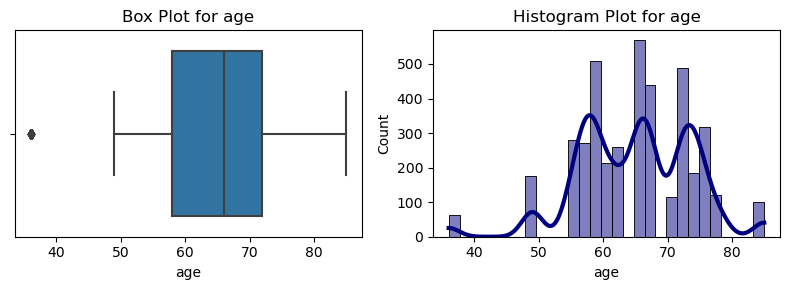

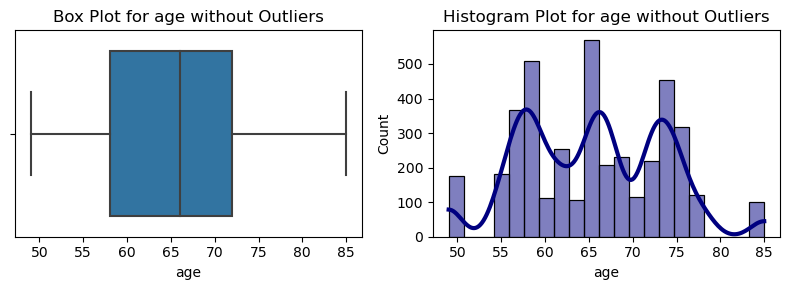

In [55]:
outlier_treatment(x_train, 'age')

Q1                                                =  47.34
Q2                                                =  91.64
Q3                                                =  138.4
IQR                                               =  91.06


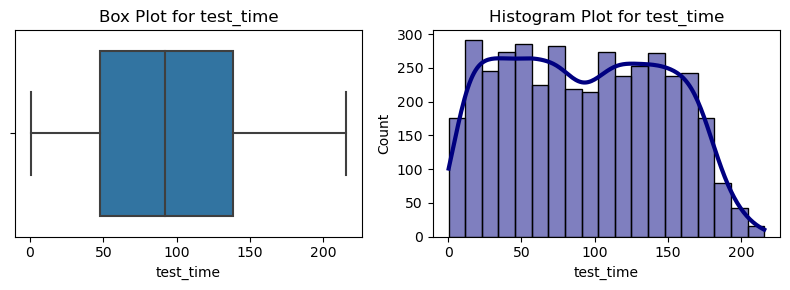

In [56]:
outlier_treatment(x_train, 'test_time')

Q1                                                =  -4.64
Q2                                                =  -4.45
Q3                                                =  -4.27
IQR                                               =  0.37
Lower Limit Value                                 =  -5.2
Total number of outliers(<Q1-1.5*IQR) for Jitter(Abs)      = 23
Upper Limit Value                                 =  -3.71
Total number of outliers(>Q3+1.5*IQR) for Jitter(Abs)      = 40
Percentage of Outliers                            = 1.56%
Do you want to remove all outliers from JITTER(ABS) column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


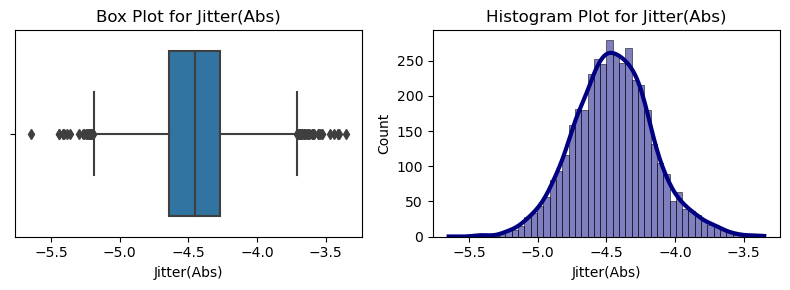

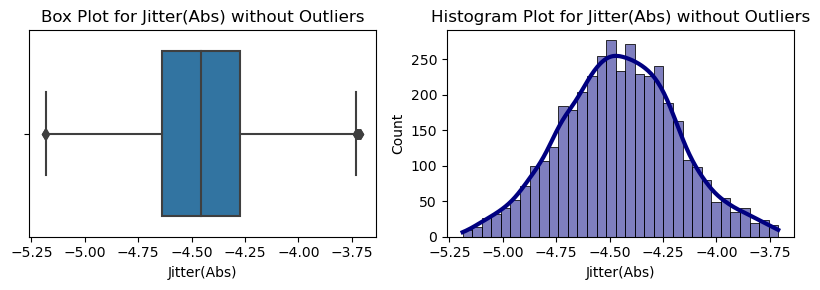

In [57]:
outlier_treatment(x_train, 'Jitter(Abs)')

Q1                                                =  -2.02
Q2                                                =  -1.86
Q3                                                =  -1.69
IQR                                               =  0.34
Lower Limit Value                                 =  -2.53
Total number of outliers(<Q1-1.5*IQR) for Shimmer:APQ3      = 20
Upper Limit Value                                 =  -1.18
Total number of outliers(>Q3+1.5*IQR) for Shimmer:APQ3      = 47
Percentage of Outliers                            = 1.68%
Do you want to remove all outliers from SHIMMER:APQ3 column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


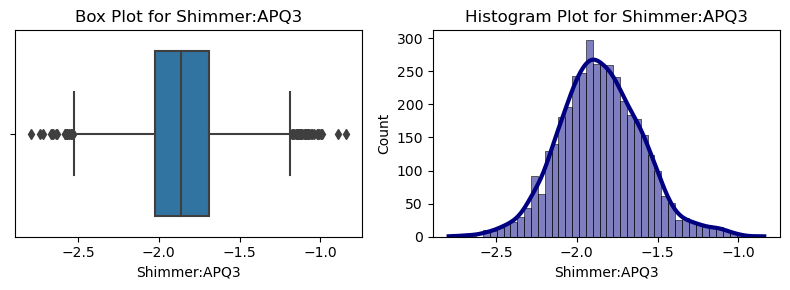

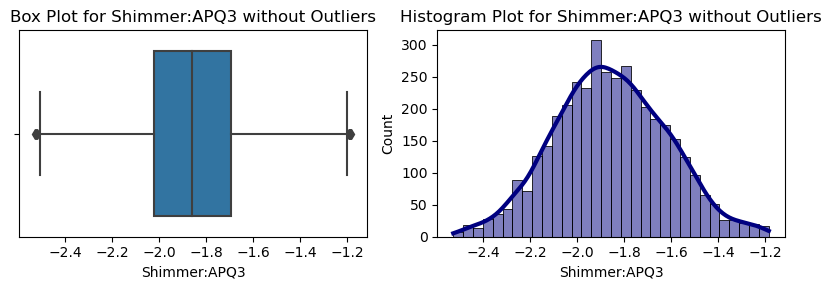

In [58]:
outlier_treatment(x_train, 'Shimmer:APQ3')

Q1                                                =  19.48
Q2                                                =  21.91
Q3                                                =  24.34
IQR                                               =  4.86
Lower Limit Value                                 =  12.18
Total number of outliers(<Q1-1.5*IQR) for HNR      = 37
Upper Limit Value                                 =  31.63
Total number of outliers(>Q3+1.5*IQR) for HNR      = 7
Percentage of Outliers                            = 1.12%
Do you want to remove all outliers from HNR column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


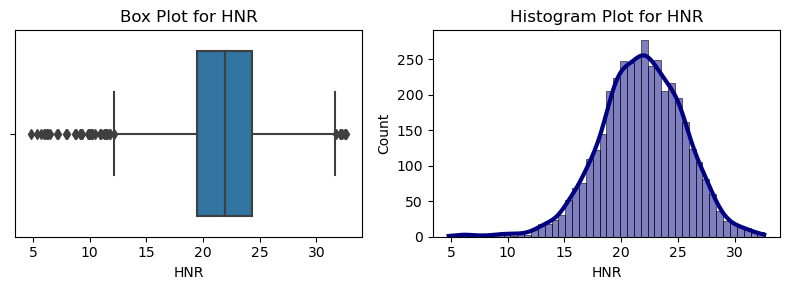

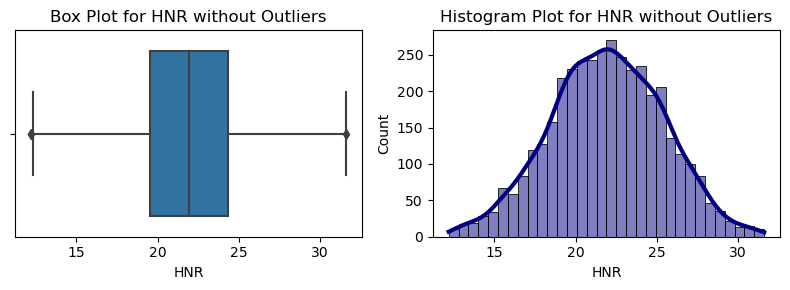

In [59]:
outlier_treatment(x_train, 'HNR')

Q1                                                =  0.47
Q2                                                =  0.54
Q3                                                =  0.61
IQR                                               =  0.14
Lower Limit Value                                 =  0.26
Total number of outliers(<Q1-1.5*IQR) for RPDE      = 3
Upper Limit Value                                 =  0.82
Total number of outliers(>Q3+1.5*IQR) for RPDE      = 8
Percentage of Outliers                            = 0.28%
Do you want to remove all outliers from RPDE column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


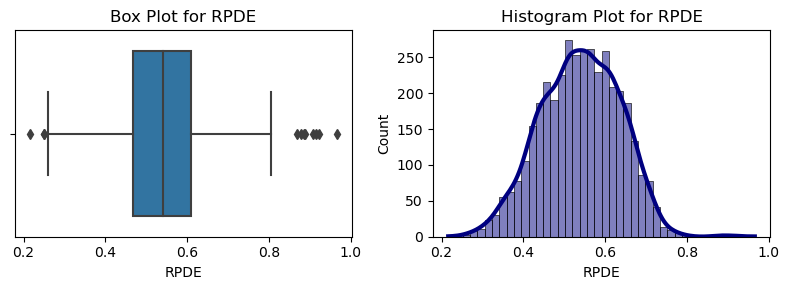

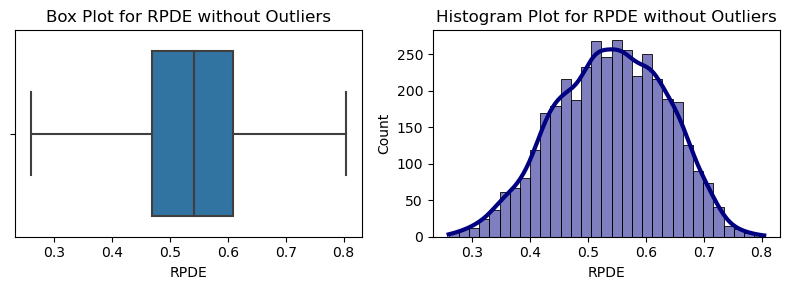

In [60]:
outlier_treatment(x_train, 'RPDE')

Q1                                                =  0.6
Q2                                                =  0.65
Q3                                                =  0.71
IQR                                               =  0.12


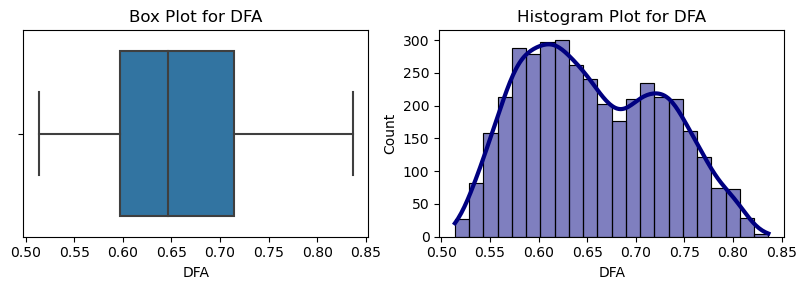

In [61]:
outlier_treatment(x_train, 'DFA')

Q1                                                =  0.16
Q2                                                =  0.21
Q3                                                =  0.26
IQR                                               =  0.1
Upper Limit Value                                 =  0.41
Total number of outliers(>Q3+1.5*IQR) for PPE      = 97
Percentage of Outliers                            = 2.51%
Do you want to remove all outliers from PPE column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


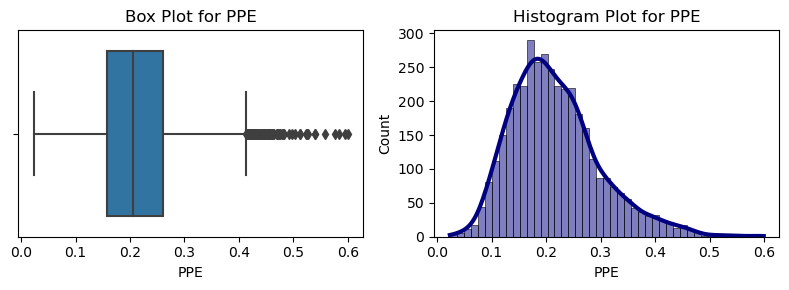

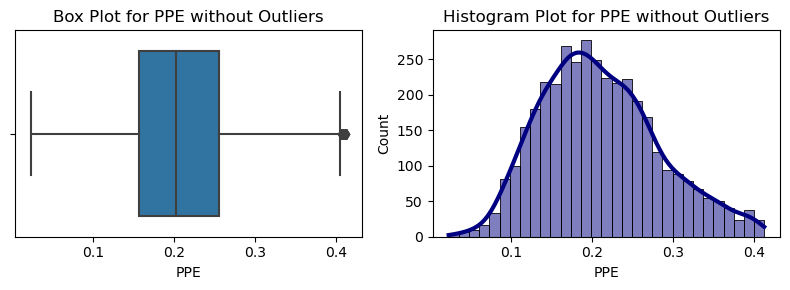

In [62]:
outlier_treatment(x_train, 'PPE')

After elimination of outliers; we noticed histograms of input columns of train dataset, look almost like a Normal Distribution.

In [63]:
print('Now Train Data contains {} rows & {} columns' .format(x_train.shape[0], x_train.shape[1]))

Now Train Data contains 3760 rows & 9 columns


#### Since we have removed outliers from X_train; so we have to reflect that change in y_train also:

In [64]:
y_train = y_train[x_train.index]
print('Shape of y_train = ', y_train.shape)

Shape of y_train =  (3760,)


### Box Plot of Train Target:

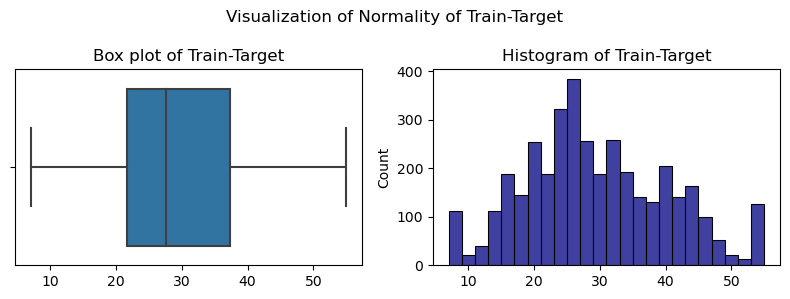

In [65]:
plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,2,1)
sns.boxplot(x=y_train.values, ax=ax1)
ax1.set_title('Box plot of Train-Target')
ax2 = plt.subplot(1,2,2)
sns.histplot(x=y_train.values, ax=ax2, color='navy', line_kws = {'lw':3, 'ls':'-'})
ax2.set_title('Histogram of Train-Target')
plt.suptitle('Visualization of Normality of Train-Target')
plt.tight_layout();

we can say, target variable is approximately normally distributed & there is no outlier

### 2. Normalization of X_train:
#### (we will be doing min-max normalization)

In [66]:
num_ip_cols = x_train.columns.tolist()
num_ip_cols.remove('sex')
scaler = MinMaxScaler()
x_train[num_ip_cols] = scaler.fit_transform(x_train[num_ip_cols])

### 3. One Hot Encoding on X_train:

In [67]:
x_train = pd.get_dummies(x_train, drop_first=True)
display(x_train.head())
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)

,age,test_time,Jitter(Abs),Shimmer:APQ3,HNR,RPDE,DFA,PPE,sex_male
3238,0.305556,0.122831,0.628101,0.610684,0.234253,0.646577,0.687881,0.421975,1
2805,0.500000,0.639135,0.655141,0.559466,0.516416,0.366727,0.748474,0.476105,1
2056,0.444444,0.641878,0.420780,0.254076,0.689121,0.416844,0.200661,0.392562,1
5467,1.000000,0.689299,0.467116,0.527604,0.505095,0.436616,0.216334,0.311894,0
2162,0.444444,0.055930,0.738563,0.461630,0.518320,0.710383,0.669952,0.705636,1


Shape of X_train =  (3760, 9)
Shape of y_train =  (3760,)


## Pre-processing on Test Dataset:

### 1. Outlier Treatment for Test Dataset:

Q1                                                =  58.0
Q2                                                =  65.0
Q3                                                =  72.0
IQR                                               =  14.0
Lower Limit Value                                 =  37.0
Total number of outliers(<Q1-1.5*IQR) for age      = 39
Percentage of Outliers                            = 2.22%
Do you want to remove all outliers from AGE column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


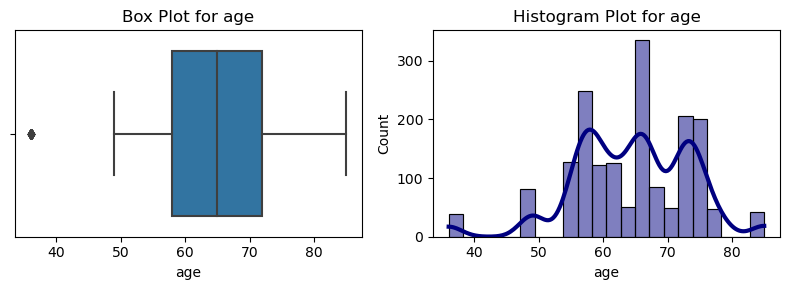

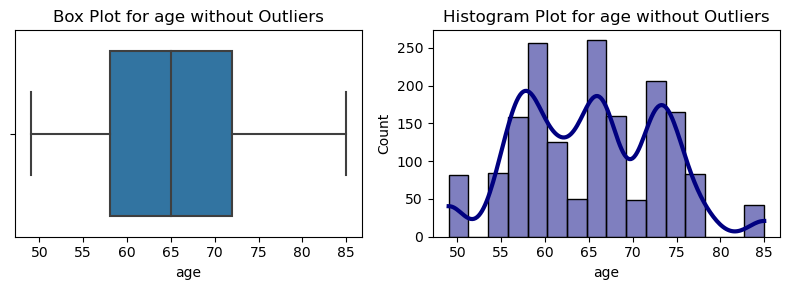

In [68]:
outlier_treatment(x_test, 'age')

Q1                                                =  47.75
Q2                                                =  92.49
Q3                                                =  139.69
IQR                                               =  91.94


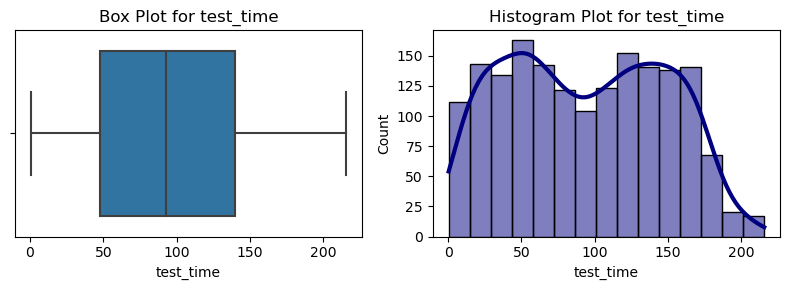

In [69]:
outlier_treatment(x_test, 'test_time')

Q1                                                =  -4.65
Q2                                                =  -4.46
Q3                                                =  -4.27
IQR                                               =  0.37
Lower Limit Value                                 =  -5.21
Total number of outliers(<Q1-1.5*IQR) for Jitter(Abs)      = 8
Upper Limit Value                                 =  -3.71
Total number of outliers(>Q3+1.5*IQR) for Jitter(Abs)      = 15
Percentage of Outliers                            = 1.34%
Do you want to remove all outliers from JITTER(ABS) column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


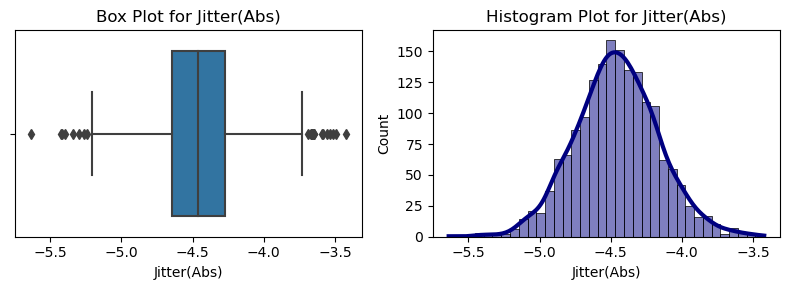

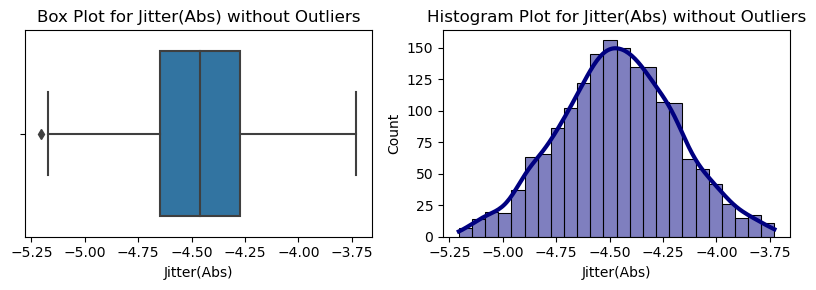

In [70]:
outlier_treatment(x_test, 'Jitter(Abs)')

Q1                                                =  -2.04
Q2                                                =  -1.86
Q3                                                =  -1.69
IQR                                               =  0.36
Lower Limit Value                                 =  -2.58
Total number of outliers(<Q1-1.5*IQR) for Shimmer:APQ3      = 4
Upper Limit Value                                 =  -1.15
Total number of outliers(>Q3+1.5*IQR) for Shimmer:APQ3      = 14
Percentage of Outliers                            = 1.06%
Do you want to remove all outliers from SHIMMER:APQ3 column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


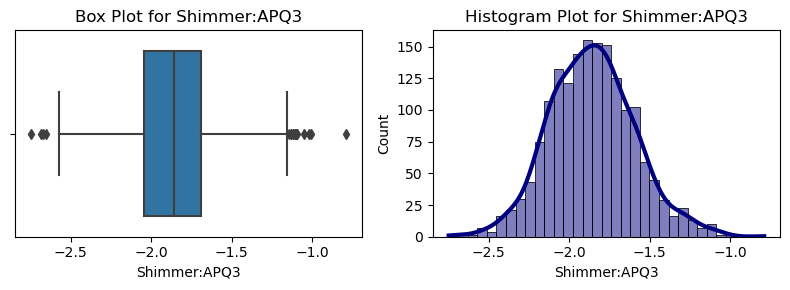

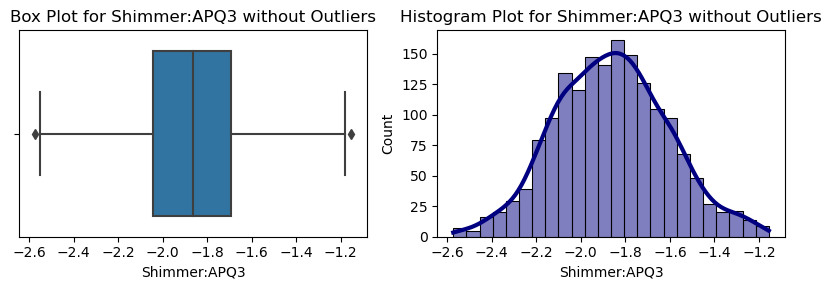

In [71]:
outlier_treatment(x_test, 'Shimmer:APQ3')

Q1                                                =  19.55
Q2                                                =  21.96
Q3                                                =  24.52
IQR                                               =  4.97
Lower Limit Value                                 =  12.1
Total number of outliers(<Q1-1.5*IQR) for HNR      = 28
Upper Limit Value                                 =  31.96
Total number of outliers(>Q3+1.5*IQR) for HNR      = 3
Percentage of Outliers                            = 1.85%
Do you want to remove all outliers from HNR column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


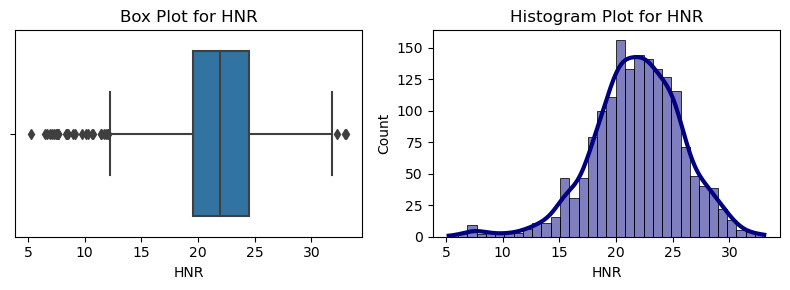

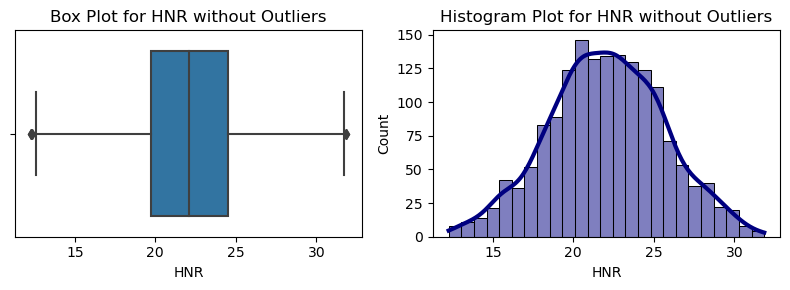

In [72]:
outlier_treatment(x_test, 'HNR')

Q1                                                =  0.47
Q2                                                =  0.54
Q3                                                =  0.61
IQR                                               =  0.14
Upper Limit Value                                 =  0.81
Total number of outliers(>Q3+1.5*IQR) for RPDE      = 1
Percentage of Outliers                            = 0.06%
Do you want to remove all outliers from RPDE column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


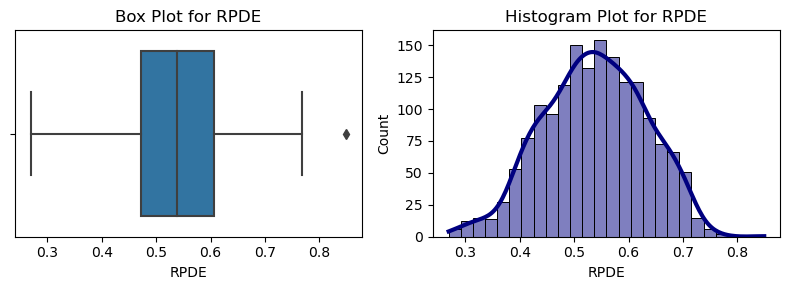

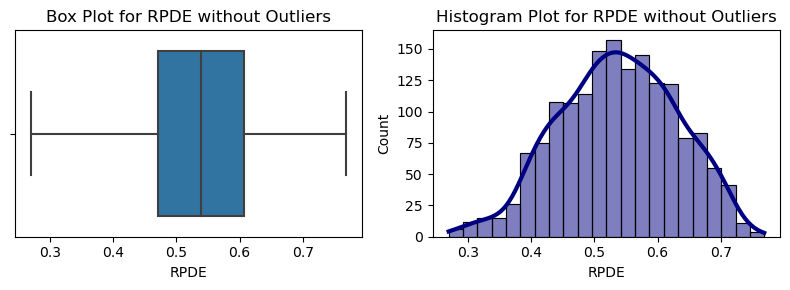

In [73]:
outlier_treatment(x_test, 'RPDE')

Q1                                                =  0.6
Q2                                                =  0.65
Q3                                                =  0.71
IQR                                               =  0.11


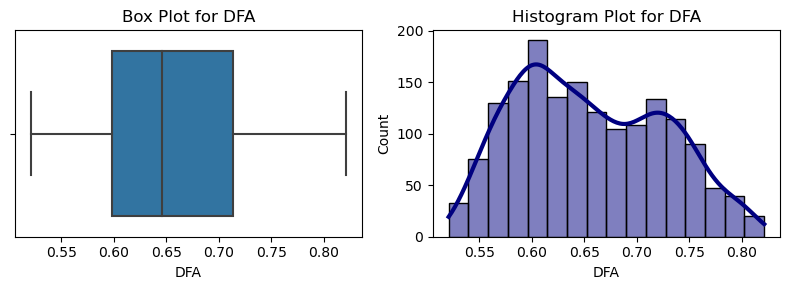

In [74]:
outlier_treatment(x_test, 'DFA')

Q1                                                =  0.16
Q2                                                =  0.2
Q3                                                =  0.26
IQR                                               =  0.1
Upper Limit Value                                 =  0.41
Total number of outliers(>Q3+1.5*IQR) for PPE      = 38
Percentage of Outliers                            = 2.31%
Do you want to remove all outliers from PPE column?                
(press y to confirm / else press n to adjust all outliers to upper or lower limit): y


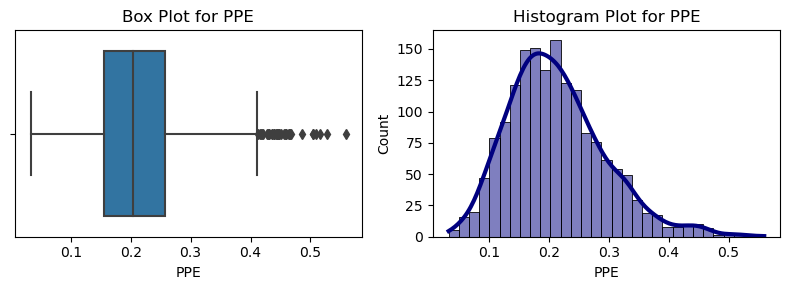

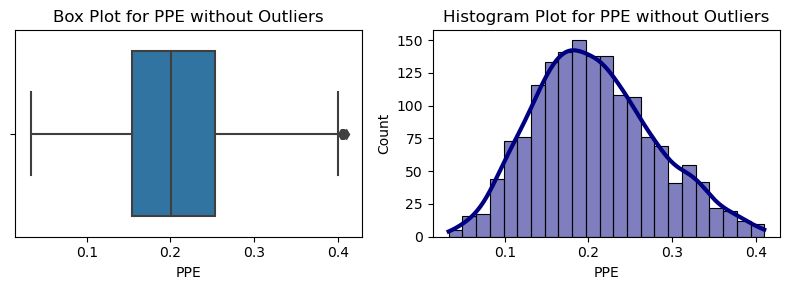

In [75]:
outlier_treatment(x_test, 'PPE')

#### Since we have removed outliers from X_test; so we have to reflect that change in y_test also:

In [76]:
print('Now Test Data contains {} rows & {} columns' .format(x_test.shape[0], x_test.shape[1]))
y_test = y_test[x_test.index]
print('Shape of y_test = ', y_test.shape)

Now Test Data contains 1609 rows & 9 columns
Shape of y_test =  (1609,)


### Box Plot of Test Target:

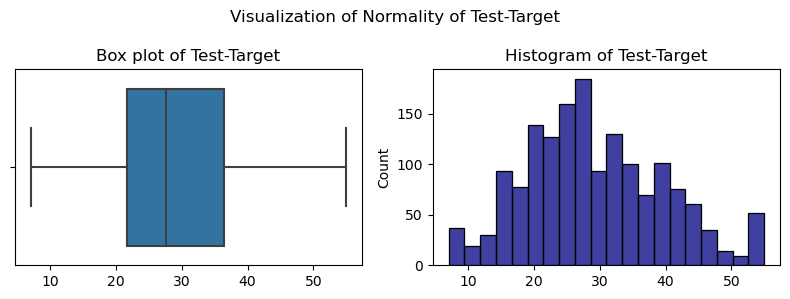

In [77]:
plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,2,1)
sns.boxplot(x=y_test.values, ax=ax1)
ax1.set_title('Box plot of Test-Target')
ax2 = plt.subplot(1,2,2)
sns.histplot(x=y_test.values, ax=ax2, color='navy', line_kws = {'lw':3, 'ls':'-'})
ax2.set_title('Histogram of Test-Target')
plt.suptitle('Visualization of Normality of Test-Target')
plt.tight_layout();

we can say, target variable is approximately normally distributed & there is no outlier

### 2. Normalization of X_test:

In [78]:
x_test[num_ip_cols] = scaler.transform(x_test[num_ip_cols])

### 3. One Hot Encoding on X_test:

In [79]:
x_test = pd.get_dummies(x_test, drop_first=True)
display(x_test.head())
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

,age,test_time,Jitter(Abs),Shimmer:APQ3,HNR,RPDE,DFA,PPE,sex_male
1364,0.250000,0.404275,0.818641,0.431826,0.488730,0.524830,0.589363,0.634079,1
5218,0.500000,0.327211,0.598356,0.487483,0.343866,0.543704,0.468591,0.584878,1
3039,0.222222,0.546199,0.104455,0.187254,0.900371,0.412721,0.178535,0.488502,0
4594,0.277778,0.079882,0.486495,0.283856,0.623765,0.527743,0.831638,0.313100,1
3258,0.305556,0.768799,0.671412,0.686598,0.166632,0.690904,0.750986,0.750192,1


Shape of X_test =  (1609, 9)
Shape of y_test =  (1609,)


## Peforming Normalization & One-Hot Encoding Technique on x (for cross-validation):

In [80]:
for col in num_ip_cols:
    x[col] = (x[col] - x[col].min())/(x[col].max() - x[col].min())

In [81]:
x = pd.get_dummies(x, drop_first=True)
display(x.head())
print('Shape of X = ', x.shape)
print('Shape of y = ', y.shape)

,age,test_time,Jitter(Abs),Shimmer:APQ3,HNR,RPDE,DFA,PPE,sex_male
0,0.734694,0.024395,0.512347,0.474403,0.551717,0.328638,0.097793,0.194544,1
1,0.734694,0.057046,0.380157,0.394396,0.704771,0.348330,0.144300,0.121335,1
2,0.734694,0.089659,0.452270,0.328699,0.590568,0.381812,0.085362,0.265104,1
3,0.734694,0.117396,0.467050,0.417529,0.629169,0.412583,0.181761,0.437884,1
4,0.734694,0.154566,0.414069,0.311823,0.675585,0.393664,0.134202,0.241814,1


Shape of X =  (5863, 9)
Shape of y =  (5863,)


## Model Implementation:

## 1. Linear Regression (Ordinary Least Square):

In [82]:
x_train_modf = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train_modf)
result = ols_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     69.17
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          2.33e-118
Time:                        06:01:24   Log-Likelihood:                -14002.
No. Observations:                3760   AIC:                         2.802e+04
Df Residuals:                    3750   BIC:                         2.809e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.5545      2.094     16.979   

**Linear Regression Equation:** <br>
y = 35.55 + 10.45*(Age) + 2.97*(test_time) - 5.42*(log(Jitter(Abs))) - 8.46*(log(Shimmer:APQ3)) -14.77*(HNR)) + 2.24*(RPDE) - 9.8*(DFA) + 7.85*(PPE) + 2.05(sex) 

In [83]:
y_pred_mlr = result.predict(sm.add_constant(x_test))
mlr_score = np.round(r2_score(y_test, y_pred_mlr),4)

no_of_rows = x_test.shape[0]
tot_no_of_input_cols = x_test.shape[1]
mlr_adj_r2_score = 1 - ((1-mlr_score)*(no_of_rows)/(no_of_rows - tot_no_of_input_cols - 1))

mlr_train_r2 = 0.142
mlr_rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred_mlr)),2)

print('Model RMSE Value       = ', mlr_rmse)
print('Test R2 score          = ', mlr_score)
print('Test Adjusted R2-score = ', np.round(mlr_adj_r2_score,4))

Model RMSE Value       =  9.8
Test R2 score          =  0.1288
Test Adjusted R2-score =  0.1234


### Modified OLS (by removing less important features as per previous OLS model):

In [84]:
x_train_modf1 = \
x_train_modf.drop(['RPDE'], axis=1)
result1 = sm.OLS(y_train, x_train_modf1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     77.39
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          1.16e-118
Time:                        06:01:24   Log-Likelihood:                -14004.
No. Observations:                3760   AIC:                         2.803e+04
Df Residuals:                    3751   BIC:                         2.808e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.1527      1.885     19.708   

**<u>Insight:</u>**<br>
We can see here; after removal of RPDE (where pvalue of t-test was greater than 0.05); R2 score didn't improve that much. So we will stick to our previous OLS model only.

### Reason behind getting Low Accuracy Score in Linear Regression model:

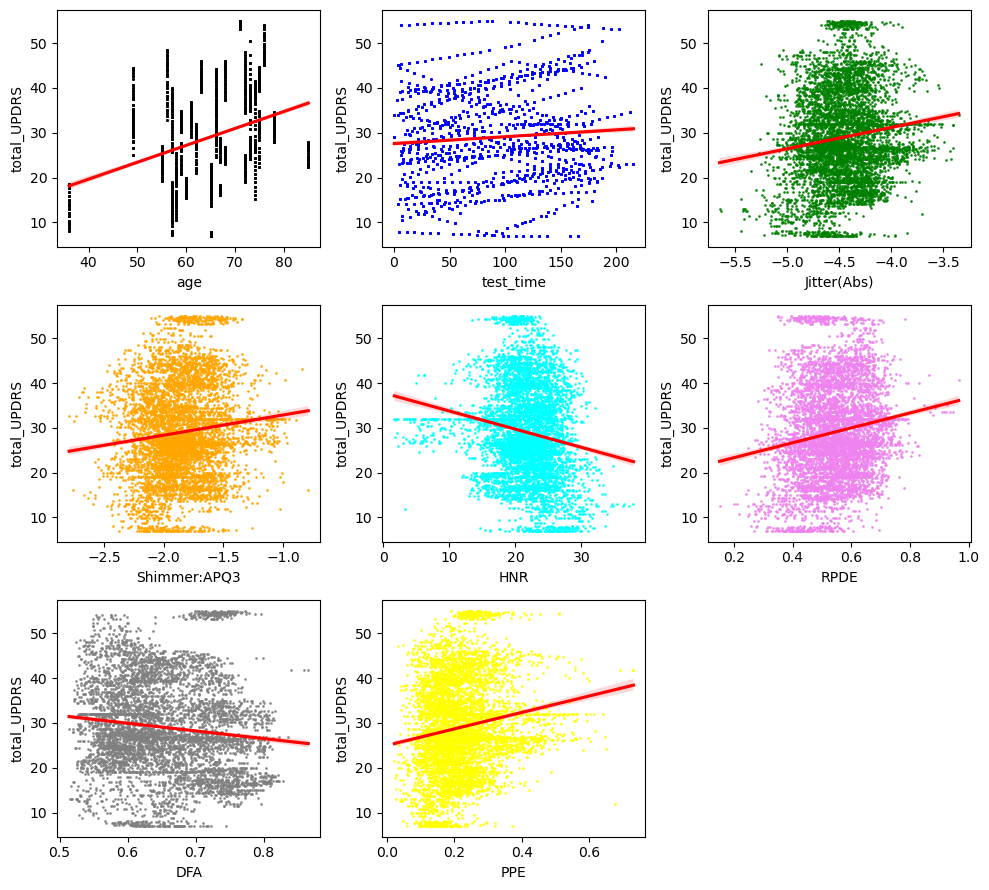

In [85]:
plt.figure(figsize=(10,9))

ax1 = plt.subplot(3,3,1)
sns.regplot(data=df1, x='age', y ='total_UPDRS', ax=ax1, color='black', scatter_kws={'s':1}, 
            line_kws={'color':'red'})

ax2 = plt.subplot(3,3,2)
sns.regplot(data=df1, x='test_time', y='total_UPDRS', ax=ax2, color='blue', scatter_kws={'s':1},
           line_kws={'color':'red'})

ax3 = plt.subplot(3,3,3)
sns.regplot(x=df1['Jitter(Abs)'], y=df1['total_UPDRS'], ax=ax3, color='green', 
            scatter_kws={'s':1}, line_kws={'color':'red'})


ax4 = plt.subplot(3,3,4)
sns.regplot(x=df1['Shimmer:APQ3'], y=df1['total_UPDRS'], ax=ax4, color='orange', 
            scatter_kws={'s':1}, line_kws={'color':'red'})

ax5 = plt.subplot(3,3,5)
sns.regplot(data=df1, x='HNR', y='total_UPDRS', ax=ax5, color='cyan', scatter_kws={'s':1}, 
            line_kws={'color':'red'})


ax7 = plt.subplot(3,3,6)
sns.regplot(data=df1, x='RPDE', y='total_UPDRS', ax=ax7, color='violet', scatter_kws={'s':1}, 
            line_kws={'color':'red'})

ax8 = plt.subplot(3,3,7)
sns.regplot(data=df1, x='DFA', y='total_UPDRS', ax=ax8, color='grey', scatter_kws={'s':1}, 
            line_kws={'color':'red'})

ax9 = plt.subplot(3,3,8)
sns.regplot(data=df1, x ='PPE', y='total_UPDRS', ax=ax9, color='yellow', scatter_kws={'s':1}, 
            line_kws={'color':'red'})

plt.tight_layout();

### Residual Analysis:

In [86]:
res_df = pd.DataFrame()
res_df['y_test'] = y_test
res_df['y_predicted'] = y_pred_mlr
res_df['residuals'] = res_df['y_test'] - res_df['y_predicted']
res_avg = np.average(res_df['residuals'])
res_df

,y_test,y_predicted,residuals
1364,19.0000,26.488680,-7.488680
5218,27.6670,32.576025,-4.909025
3039,9.9866,27.060686,-17.074086
4594,33.2270,21.984504,11.242496
3258,19.7230,31.255728,-11.532728
...,...,...,...
914,24.0820,32.847408,-8.765408
5120,40.6370,26.581853,14.055147
2602,26.6630,26.298683,0.364317
704,40.8400,32.247267,8.592733


### Residual Plot based on Linear Regression model:

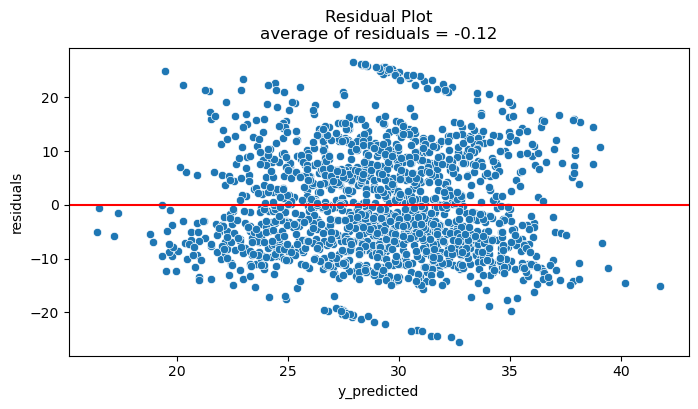

In [87]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = res_df, x = 'y_predicted', y = 'residuals')
plt.axhline(y = 0, color = 'r')
plt.title('Residual Plot\naverage of residuals = %s' %(np.round(res_avg,2)));

The above residual plot shows; homoscedasticity property. <br>
Still we will perfrom statistical test to be sure about **homoscedasticity**.

### Goldfeld Quandt Test: 
**H0:** Error terms are homoscedastic <br>
**Ha:** Error terms are heteroscedastic

In [88]:
import statsmodels.stats.api as sm
from statsmodels.compat import lzip

print('p-value = ', sm.het_goldfeldquandt(res_df['residuals'], x_test)[1])
print("\nSince p-value is more than 0.05; we can't reject Null Hypothesis (H0)")
print("It means error terms are homoscedastic; which we infered from the above residual plot.")

p-value =  0.2769238928475486

Since p-value is more than 0.05; we can't reject Null Hypothesis (H0)
It means error terms are homoscedastic; which we infered from the above residual plot.


### Durbin-Watson Test to check presence of Autocorrelation:
**H0:** There is no correlation among the residuals <br>
**Ha:** The residuals are autocorrelated.

In [89]:
from statsmodels.stats.stattools import durbin_watson

print('Test Statistic = ', durbin_watson(res_df['residuals']))
print('\nSince test statistic is almost equal to 2; so we would consider autocorrelation \
not to be problematic for this regression model')

Test Statistic =  1.989462704528598

Since test statistic is almost equal to 2; so we would consider autocorrelation not to be problematic for this regression model


### Plotting Distribution of Residuals and corresponding Q-Q plot:

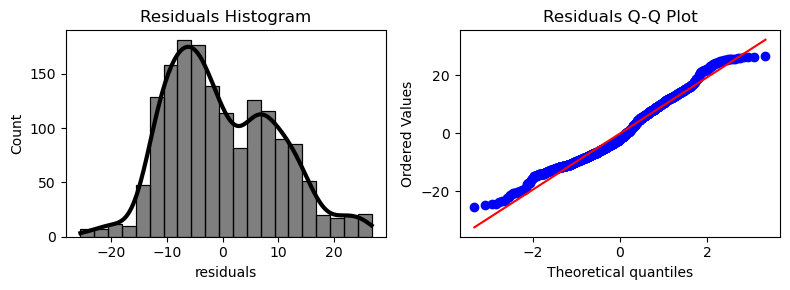

In [90]:
plt.figure(figsize=(8,3))
ax_1 = plt.subplot(1,2,1)
sns.histplot(data = res_df, x = 'residuals', kde = True, ax = ax_1, 
             color='black', line_kws = {'lw':3, 'ls':'-'})
ax_1.set_title('Residuals Histogram');

ax_2 = plt.subplot(1,2,2)
stats.probplot(res_df['residuals'], dist = 'norm', plot = plt)
ax_2.set_title('Residuals Q-Q Plot')
plt.tight_layout();

From above plot, we can see; residuals are roughly approximating a normal distribution of mean close to 0. <br>
Which was another important assumption of Linear Regression Model; validated successfully.

## 2. Gradient-Descent Approach for Linear Regression:

In [91]:
# Creating Design Matrix:
X = x_train.values
print(X)
print('\nSize of X = ', X.shape)

[[0.30555556 0.12283071 0.62810099 ... 0.68788149 0.42197526 1.        ]
 [0.5        0.6391348  0.65514067 ... 0.74847406 0.47610492 1.        ]
 [0.44444444 0.64187779 0.42077978 ... 0.20066124 0.39256198 1.        ]
 ...
 [0.52777778 0.68320852 0.42739109 ... 0.59117497 0.42959807 1.        ]
 [0.72222222 0.0973721  0.43064246 ... 0.29148652 0.31104666 1.        ]
 [0.66666667 0.70403661 0.47090607 ... 0.33449898 0.41581541 1.        ]]

Size of X =  (3760, 9)


In [92]:
Y = y_train.values
print('Y = ',Y)
print('\nSize of Y = ', Y.shape)

Y =  [16.022 16.475 21.194 ... 26.006 39.696 44.338]

Size of Y =  (3760,)


In [93]:
# Initializing Variables:
b = 0
W = np.ones(X.shape[1])
learning_rate = 0.08
print('W = ',W)
print('Size of W = ', W.shape)

W =  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Size of W =  (9,)


In [94]:
def derivative_of_L_wrt_W():
    dLdW = []
    j = 0
    for j in range(0,X.shape[1]):
        x_j = X[:,j]
        s = i = a = 0
        for i in range(0, x_j.shape[0]):
            a = x_j[i]*(Y[i]-Y_predicted[i])
            s = s + a
        dLdW.append((-2/n)*s)
    return (np.array(dLdW))

### Logic for finding optimized coefficients and intercept value:

In [95]:
epoc = np.arange(start=0, stop = 9501, step = 1)
n = 0
loss_function = []
n = x.shape[0]
k = 0
w0_store = [] 

for k in epoc:
    Y_predicted = np.dot(X,W) + b
    L = (1/n) * np.sum((Y - Y_predicted)**2)
    loss_function.append(L)
    dLdw = derivative_of_L_wrt_W()
    W = W - (learning_rate * dLdw)
    dLdB = (-2/n)*np.sum(Y - Y_predicted)
    w0_store.append(b)  
    b = b - (learning_rate * dLdB)

### Coefficient values based on Training Dataset:

In [96]:
print('Intercept Term (W0) = ', b)
print('\nW = \n', W)

Intercept Term (W0) =  34.00006001401304

W = 
 [ 10.43249047   2.99247819  -4.97029479  -7.69642426 -13.3502108
   2.62031275  -9.76881674   8.01556605   1.98012956]


### Visualization of Loss Function w.r.t Epoc:

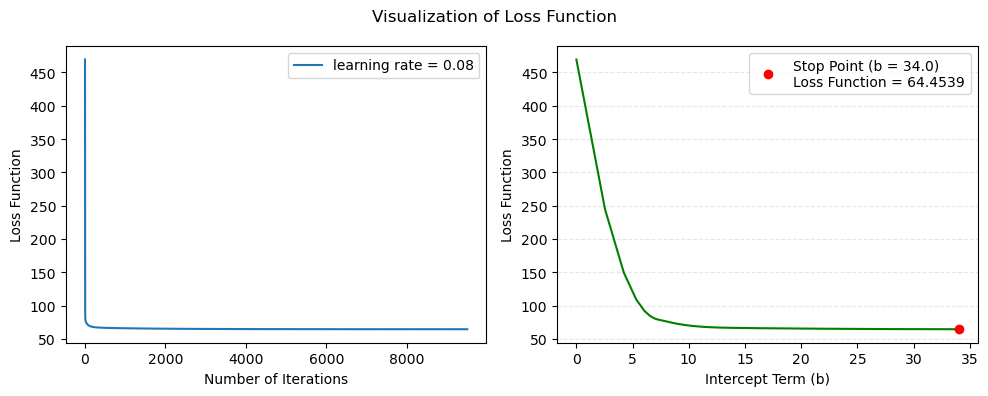

In [97]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(epoc, loss_function, label = 'learning rate = %s' %(learning_rate))
ax[0].set_xlabel('Number of Iterations')
ax[0].set_ylabel('Loss Function')
ax[0].legend()

ax[1].plot(w0_store, loss_function, 'g-')
ax[1].plot(b,L,'ro', label = 'Stop Point (b = %s)\nLoss Function = %s' %(np.round(b,3),np.round(L,4)))
ax[1].set_xlabel('Intercept Term (b)')
ax[1].set_ylabel('Loss Function')
ax[1].grid(axis = 'y', alpha = 0.3, ls = '--')
ax[1].legend()

plt.suptitle('Visualization of Loss Function')
plt.tight_layout()
plt.show()

In [98]:
print('After 9500 iterations, we have achieved the optimal coefficient values.')
print('At that point, value of Loss Function is = {}' .format(np.round(L,4)))

After 9500 iterations, we have achieved the optimal coefficient values.
At that point, value of Loss Function is = 64.4539


### Finding Y_Predicted value based on test data:

In [99]:
y_pred_grad_desc_mlr = np.dot(x_test.values,W) + b
res_df1 = pd.DataFrame()
res_df1['y_test'] = y_test
res_df1['y_predicted'] = y_pred_grad_desc_mlr
res_df1['residuals'] = res_df1['y_test'] - res_df1['y_predicted']
res_df1

,y_test,y_predicted,residuals
1364,19.0000,26.581391,-7.581391
5218,27.6670,32.394264,-4.727264
3039,9.9866,27.225381,-17.238781
4594,33.2270,21.955466,11.271534
3258,19.7230,31.109830,-11.386830
...,...,...,...
914,24.0820,32.795177,-8.713177
5120,40.6370,26.542289,14.094711
2602,26.6630,26.364461,0.298539
704,40.8400,32.304419,8.535581


### Model (using Gradient Descent) Metrics: 

In [100]:
print('Expectation of Residuals = ', np.round(np.mean(res_df1['residuals']),2))
print('R2 Score = ', np.round(r2_score(y_test,y_pred_grad_desc_mlr),4))

Expectation of Residuals =  -0.12
R2 Score =  0.129


## 3. Polynomial Regression Model:

In [101]:
deg = np.arange(1,5,1)
train_r2_score_poly = []
test_r2_score_poly = []
y_pred_poly_trans = []
d = 0

for d in deg:
    poly = x_train_poly = x_test_poly = mlr1 = y_pred_poly = mlr1_score = ''
    
    poly = PolynomialFeatures(degree=d)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    mlr1 = LinearRegression()
    mlr1.fit(x_train_poly, y_train)
    y_pred_poly = mlr1.predict(x_test_poly)
    y_pred_poly_trans.append(y_pred_poly)
    mlr1_train_score = mlr1.score(x_train_poly, y_train)
    mlr1_test_score = mlr1.score(x_test_poly, y_test)
    train_r2_score_poly.append(mlr1_train_score)
    test_r2_score_poly.append(mlr1_test_score)

### Visualization of Best R2 score for different polynomial degrees:

,Polynomial_Degree,Train_R2_Score,Test_R2_Score
0,1,0.142375,0.128835
1,2,0.312183,0.293227
2,3,0.534457,0.457631
3,4,0.691363,0.424140


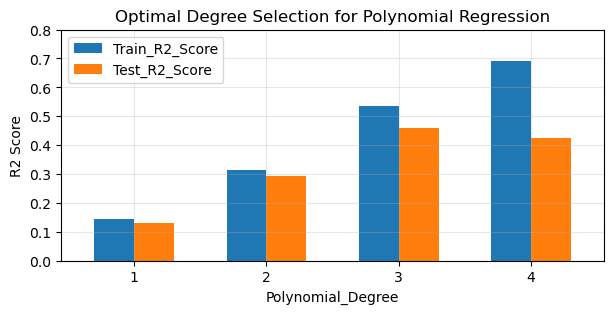

In [102]:
poly_df = pd.DataFrame()
poly_df['Polynomial_Degree'] = deg
poly_df['Train_R2_Score'] = train_r2_score_poly
poly_df['Test_R2_Score'] = test_r2_score_poly
display(poly_df)

poly_df.plot(kind = 'bar', x = 'Polynomial_Degree', width = 0.6, figsize = (7,3),
             title='Optimal Degree Selection for Polynomial Regression')
plt.xticks(rotation = 0)
plt.ylim(0,0.8)
plt.grid(alpha = 0.3)
plt.ylabel('R2 Score')
plt.show()

We found Optimal Polynomial Degree as 3

### Fitting data to 3rd degree Polynomial Model:

In [103]:
opt_deg = 3
pr = PolynomialFeatures(degree=opt_deg)
x_train_pr_2 = pr.fit_transform(x_train)
x_test_pr_2 = pr.transform(x_test)

In [104]:
len(pr.powers_)

220

In [105]:
# Shape of input train data:
np.round(x_train,2).shape

(3760, 9)

In [106]:
# Shape of transformed input train data:
np.round(x_train_pr_2,2).shape

(3760, 220)

it means due to polynomial transformation from 9 input columns, 220 input columns have been created.

In [107]:
# Shape of transformed input test data:
np.round(x_test_pr_2,2).shape

(1609, 220)

### Polynomial Model Metrics:

In [108]:
LR_2 = LinearRegression()
LR_2.fit(x_train_pr_2, y_train)
poly_intercept = LR_2.intercept_
poly_coef = LR_2.coef_

y_pred_polynomial_train = LR_2.predict(x_train_pr_2)
y_pred_polynomial_test = LR_2.predict(x_test_pr_2)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_polynomial_test))
poly_score_test = r2_score(y_test, y_pred_polynomial_test)
poly_score_train = r2_score(y_train, y_pred_polynomial_train)

print('Intercept Value         = ', poly_intercept, '\n')
print('Coefficients value = \n', poly_coef, '\n')
print('Model(test) RMSE Value = ', poly_rmse)
print('\nTrain Accuracy score   = ', poly_score_train)
print('Test Accuracy score    = ', poly_score_test)

Intercept Value         =  -133.4767358482746 

Coefficients value = 
 [-4.45444241e-12 -7.91278636e+01  1.13725737e+02  2.15711504e+02
 -1.09235843e+02  4.82084810e+02  3.64950172e+02 -1.89272965e+02
  2.28234615e+02 -4.77203366e+01  1.48225008e+02 -2.33965054e+01
 -2.68079011e+02 -9.55800620e+00 -1.17113033e+02 -1.71590914e+02
  3.09884264e+02  2.03702539e+02  5.93881031e+01  5.51691211e+01
  1.21013898e+02 -8.83100231e+01 -1.49564534e+02 -2.00859784e+02
 -9.72350057e+01 -4.69523039e+01 -1.55258235e+01 -3.89824957e+02
  1.98374195e+02 -3.28636703e+02  1.24853313e+02 -9.70923681e+00
 -4.12228193e+01  2.10843371e+01  1.86036015e+02  3.01352736e+02
  4.66834989e+00  1.14206921e+02 -3.30395309e+02  1.74434957e+00
 -4.03401169e+02 -4.93464936e+02  6.60652050e+01 -5.72181389e+02
  1.16807126e+02 -1.40251095e+02  8.57957101e+01 -3.93097115e+02
 -2.60695290e+01  3.87645963e+01  1.54587075e+02  5.17489277e+01
 -2.24435337e+01  8.45544830e+01 -4.77203366e+01 -6.49892135e+01
 -5.92558458e+01  2

### Residual Analysis for Polynomial Model:

In [109]:
# Creation of residuals:
res_df2 = pd.DataFrame()
res_df2['y_test'] = y_test
res_df2['y_predicted'] = y_pred_polynomial_test
res_df2['residuals'] = res_df2['y_test'] - res_df2['y_predicted']
res_df2

,y_test,y_predicted,residuals
1364,19.0000,26.632697,-7.632697
5218,27.6670,29.337952,-1.670952
3039,9.9866,15.418318,-5.431718
4594,33.2270,26.993768,6.233232
3258,19.7230,27.769226,-8.046226
...,...,...,...
914,24.0820,35.327536,-11.245536
5120,40.6370,26.852865,13.784135
2602,26.6630,27.434998,-0.771998
704,40.8400,37.496185,3.343815


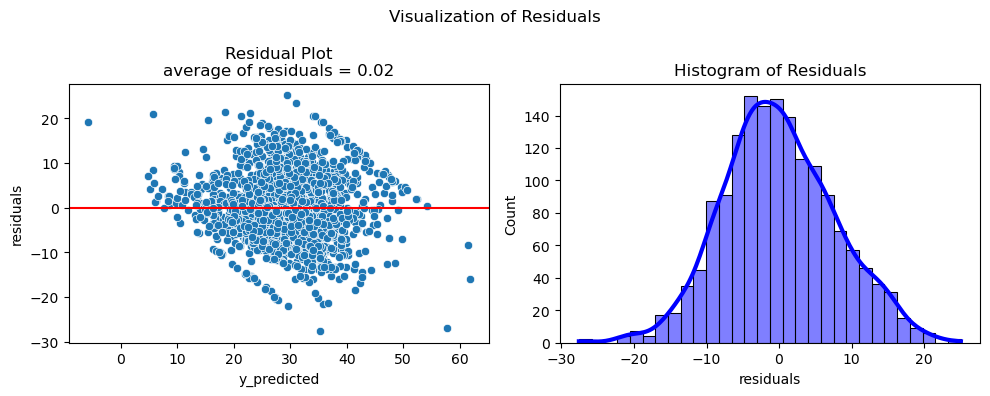

In [110]:
# Visualization of residuals:
ax1 = ax2 = 0
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
sns.scatterplot(data = res_df2, x = 'y_predicted', y = 'residuals', ax=ax1)
ax1.axhline(y = 0, color = 'r')
ax1.set_title('Residual Plot\naverage of residuals = %s' %(np.round(np.mean(res_df2['residuals']),2)))

ax2 = plt.subplot(1,2,2)
sns.histplot(data=res_df2, x='residuals', kde=True, ax=ax2, color='blue',
             line_kws = {'lw':3, 'ls':'-'})
ax2.set_title('Histogram of Residuals')

plt.suptitle('Visualization of Residuals')
plt.tight_layout();

# 4. Fitting data to KNN Regression:

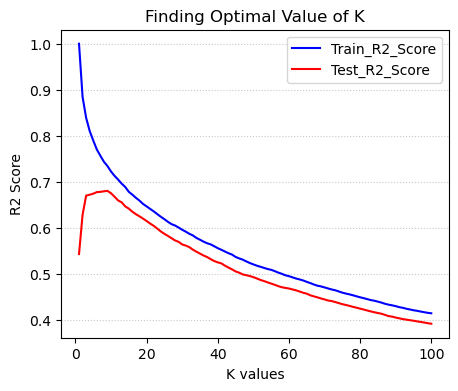

In [111]:
# Finding Optimized value of K:
k = 0
no_of_iteration = 100
knn_train_r2_score = []
knn_test_r2_score = []

for k in np.arange(1,(no_of_iteration+1)): 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    test_r2_score_knn = r2_score(y_test, knn.predict(x_test))
    knn_test_r2_score.append(test_r2_score_knn)
    train_r2_score_knn = r2_score(y_train, knn.predict(x_train))
    knn_train_r2_score.append(train_r2_score_knn)

plt.figure(figsize=(5,4))
plt.plot(range(1,(no_of_iteration+1)), knn_train_r2_score, 'b-', label = 'Train_R2_Score')
plt.plot(range(1,(no_of_iteration+1)), knn_test_r2_score, 'r-', label = 'Test_R2_Score')
plt.title('Finding Optimal Value of K')
plt.xlabel('K values')
plt.ylabel('R2 Score')
plt.grid(axis='y', alpha=0.7, ls = ':')
plt.legend();

Optimal K value = 10

In [112]:
# Fitting data to KNN model:
knn1 = KNeighborsRegressor(n_neighbors=10)
knn1.fit(x_train, y_train)
y_pred_knn1 = knn1.predict(x_test)
knn1_score = r2_score(y_test, y_pred_knn1)
knn1_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn1))
knn1_score_train = r2_score(y_train, knn1.predict(x_train))
print('Model RMSE Value        = ', knn1_rmse)
print('Train Accuracy score    = ', knn1_score_train)
print('Test Accuracy score     = ', knn1_score)

Model RMSE Value        =  5.982205271551287
Train Accuracy score    =  0.722355493533884
Test Accuracy score     =  0.6751204745988968


## 5. Fitting data to Decision Tree Model:

In [113]:
dt = DecisionTreeRegressor(random_state=1234)
dt.fit(x_train, y_train)
y_pred_dt_test = dt.predict(x_test)
dt_train_accuracy = dt.score(x_train, y_train)
dt_test_accuracy = dt.score(x_test, y_test)
print('Train Score = ', dt_train_accuracy)
print('Test Score  = ', dt_test_accuracy)
print('RMSE value  = ', np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))

Train Score =  1.0
Test Score  =  0.9681309970296073
RMSE value  =  1.8736323595942144


Clearly we can see, our model is overfitting on training data.

### Finding Optimum Max_Depth value to reduce Overfitting through Cross Validation:

In [114]:
avg_train_list = []
avg_test_list = []
avg_train_rmse_list = []
avg_test_rmse_list = []

for depth in range(1,16):
    dtc_1 = DecisionTreeRegressor(max_depth=depth)
    dtc_cv1 = cross_validate(dtc_1, x, y, scoring=['r2','neg_root_mean_squared_error'], cv=10, 
                             return_train_score=True)
    dtc_avg_train_r2 = dtc_cv1['train_r2'].mean()*100
    avg_train_list.append(dtc_avg_train_r2)
    dtc_avg_train_rmse = dtc_cv1['train_neg_root_mean_squared_error'].mean()
    avg_train_rmse_list.append(dtc_avg_train_rmse)
    dtc_avg_test_r2 = dtc_cv1['test_r2'].mean()*100
    avg_test_list.append(dtc_avg_test_r2)
    dtc_avg_test_rmse = dtc_cv1['test_neg_root_mean_squared_error'].mean()
    avg_test_rmse_list.append(dtc_avg_test_rmse)
    dtc_1 = ''

temp_df1 = pd.DataFrame()
temp_df1['max depth'] = range(1,16)
temp_df1['avg train score'] = avg_train_list
temp_df1['avg train neg rmse'] = avg_train_rmse_list
temp_df1['avg test neg rmse'] = avg_test_rmse_list
temp_df1.set_index(['max depth'], inplace=True)
temp_df1

,avg train score,avg train neg rmse,avg test neg rmse
max depth,,,
1,17.310058,-9.717098,-10.570089
2,26.361359,-9.165704,-12.120625
3,40.635859,-8.231268,-12.967619
4,54.338547,-7.216169,-13.500898
5,65.560933,-6.247469,-13.523626
6,74.731500,-5.337877,-13.415499
7,83.694999,-4.265832,-14.058069
8,90.784421,-3.186803,-12.753062
9,94.803086,-2.374387,-12.910925


From here, we can choose optimum 'max depth' value as 7 or 8 <br>
lets choose it as 8

### Decision Tree with Optimized Hyperparameter:

In [115]:
dtc_2 = DecisionTreeRegressor(random_state=1234, max_depth=8)
dtc_2.fit(x_train, y_train)
y_pred_dtc2_test = dtc_2.predict(x_test)
dtc2_train_accuracy = dtc_2.score(x_train, y_train)
dtc2_test_accuracy = dtc_2.score(x_test, y_test)
dtc2_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dtc2_test))

print('Train Score = ', dtc2_train_accuracy)
print('Test Score  = ', dtc2_test_accuracy)
print('RMSE value  = ', dtc2_rmse)

Train Score =  0.9451672867640711
Test Score  =  0.9207799006327337
RMSE value  =  2.9540499300221317


## 6. Fitting data to Random Forest Model:

In [116]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(x_train, y_train)
y_pred_rf_test = rf.predict(x_test)
rf_train_accuracy = rf.score(x_train, y_train)
rf_test_accuracy = rf.score(x_test, y_test)
rf2_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
print('Train Score = ', rf_train_accuracy)
print('Test Score  = ', rf_test_accuracy)
print('RMSE value  = ', rf2_rmse)

Train Score =  0.9961285887317558
Test Score  =  0.9770411355665295
RMSE value  =  1.5902863893489787


# Summary:

In [117]:
summary_df = pd.DataFrame()
summary_df['model'] = ['linear regression', 'polynomial regression', 'knn', 'decision tree', 
                       'random forest']
summary_df['train r2'] = [mlr_train_r2, poly_score_train, knn1_score_train, dtc2_train_accuracy,
                                rf_train_accuracy] 
summary_df['test r2'] = [mlr_score, poly_score_test, knn1_score, dtc2_test_accuracy, 
                               rf_test_accuracy]
summary_df['rmse'] = [mlr_rmse, poly_rmse, knn1_rmse, dtc2_rmse, rf2_rmse]
summary_df.set_index('model', inplace=True)
summary_df

,train r2,test r2,rmse
model,,,
linear regression,0.142000,0.128800,9.800000
polynomial regression,0.534457,0.457631,7.729429
knn,0.722355,0.675120,5.982205
decision tree,0.945167,0.920780,2.954050
random forest,0.996129,0.977041,1.590286


Based on least RMSE, we can say random forest is the best performing model among all.

### <u> Future Scope of this Project:</u>
* Corr test to check whether the correlation coefficients are really significant or not
* Multivariate Outlier Analysis
* Applying more non-linear models to improve rmse